# QuickGuide for Rtings

[프로젝트 페이지: Research-on-the-TV-market](https://github.com/xikest/research-market-tv)

## Env setting: Install requirements

In [2]:
!pip install -U pandas openpyxl tqdm
!pip install -U requests selenium beautifulsoup4 
!pip install -U wordcloud nltk 
!pip install -U scikit-learn openai 
!pip install -U matplotlib seaborn plotly
!pip install -U getmodelspec

In [3]:
from market_research.tools.installer import Installer
Installer.install_chrome_and_driver()

# Data Preparing

## Env. Import

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from market_research.scraper.rtings import Rtings, Rurlsearcher, Rvisualizer
from market_research.tools import FileManager

## Preparing

- Input model list

In [200]:
file_name = "sony_model_info_web_2023-11-19.xlsx"
sony__web_df=pd.read_excel(file_name, sheet_name="raw_na")

In [204]:
model_list = list(set(sony__web_df.model))

In [6]:
# model_list = ["c3","A80l","a95l","g3","x95l"]

---

In [7]:
rurlsearcher = Rurlsearcher()
urls = rurlsearcher.get_urls_web(keywords= model_list)
print(urls)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:00<00:00, 12.05s/it]

['https://www.rtings.com/tv/reviews/lg/c3-oled', 'https://www.rtings.com/tv/reviews/sony/a80l-a80cl-oled', 'https://www.rtings.com/tv/reviews/sony/a95l-oled', 'https://www.rtings.com/tv/reviews/lg/g3-oled', 'https://www.rtings.com/tv/reviews/sony/x95l']


## Gathering

In [8]:
rtings = Rtings()
data_dict = rtings.get_data(urls=urls)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [04:12<00:00, 50.47s/it]


# plot

- seaborn plot color map: https://seaborn.pydata.org/tutorial/color_palettes.html  
- plotly plot color map: https://plotly.com/python/builtin-colorscales/

In [9]:
measurement_df = data_dict.get("measurement")
rvisualizer = Rvisualizer(measurement_df)

## Rtings scores

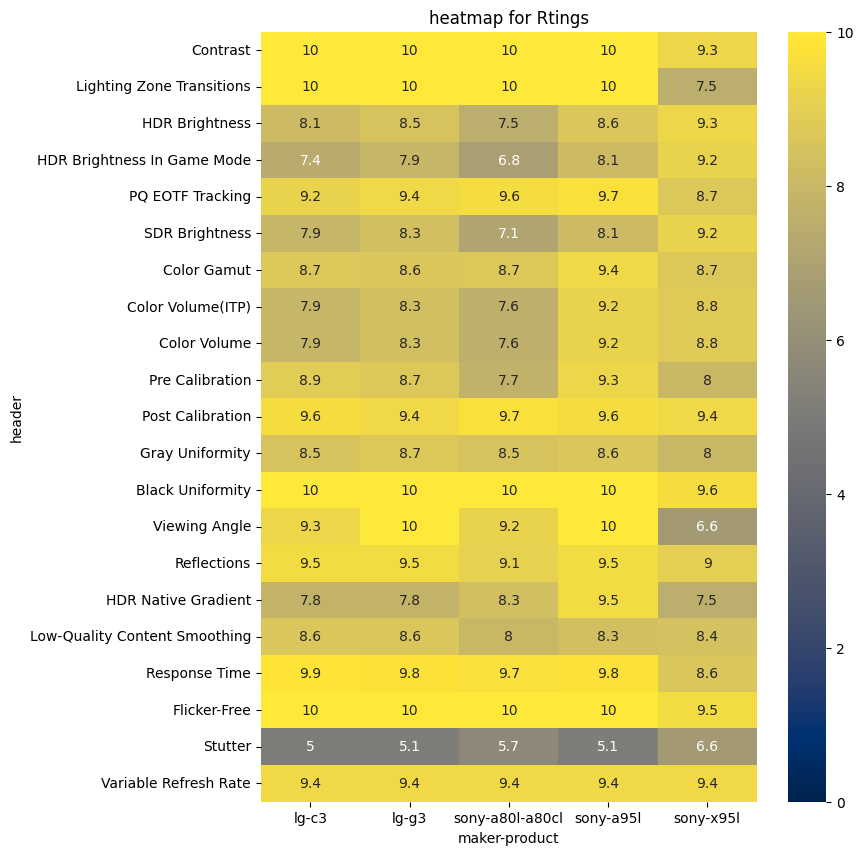

In [10]:
rvisualizer.heatmap_scores()

## Plot detail

### HDR Brightness

In [11]:
target_col = 'HDR Brightness'
yticks = [200,500,1000,1500]
ylims = (0, 2000)

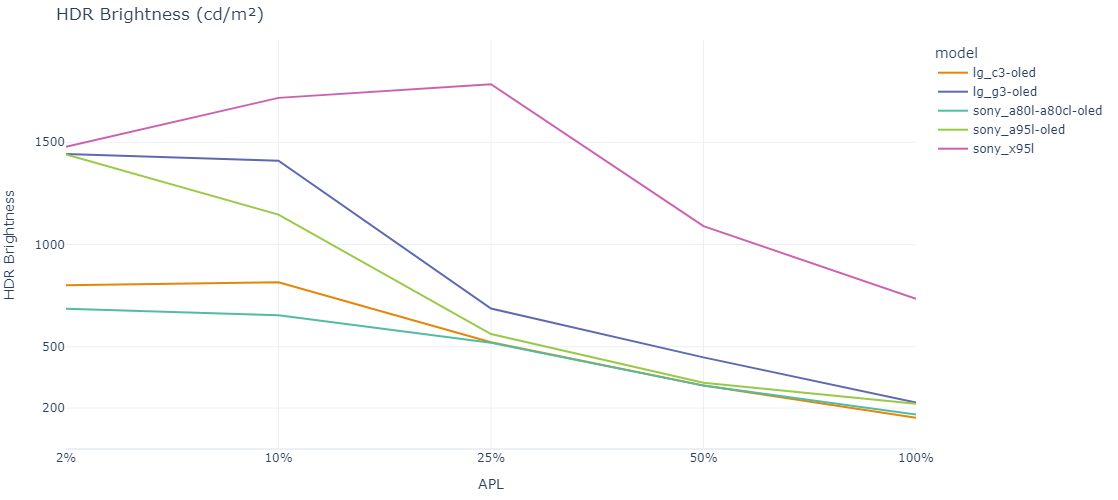

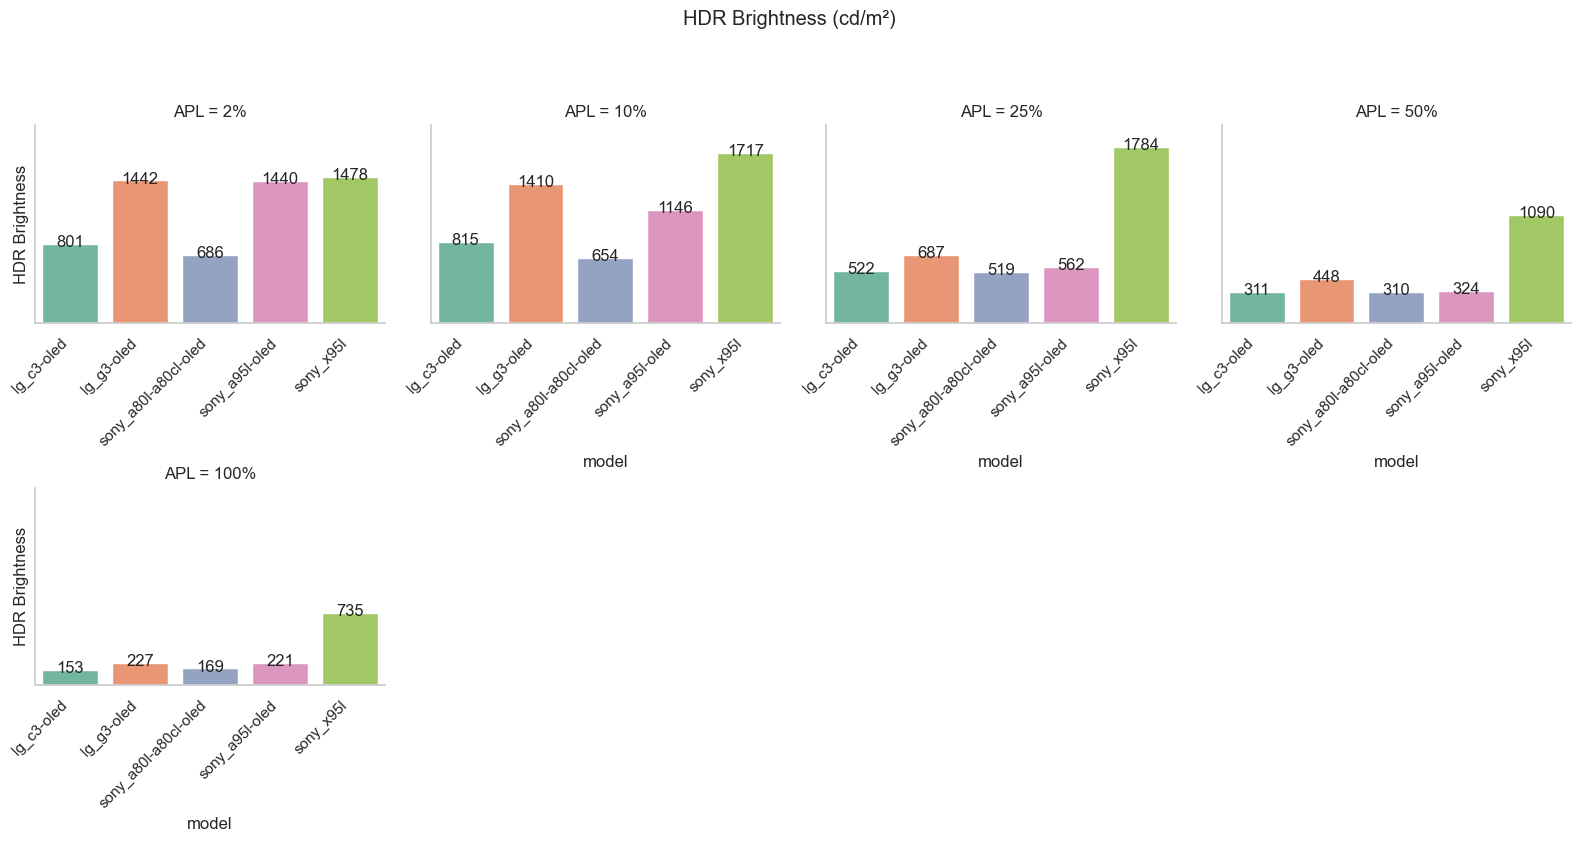

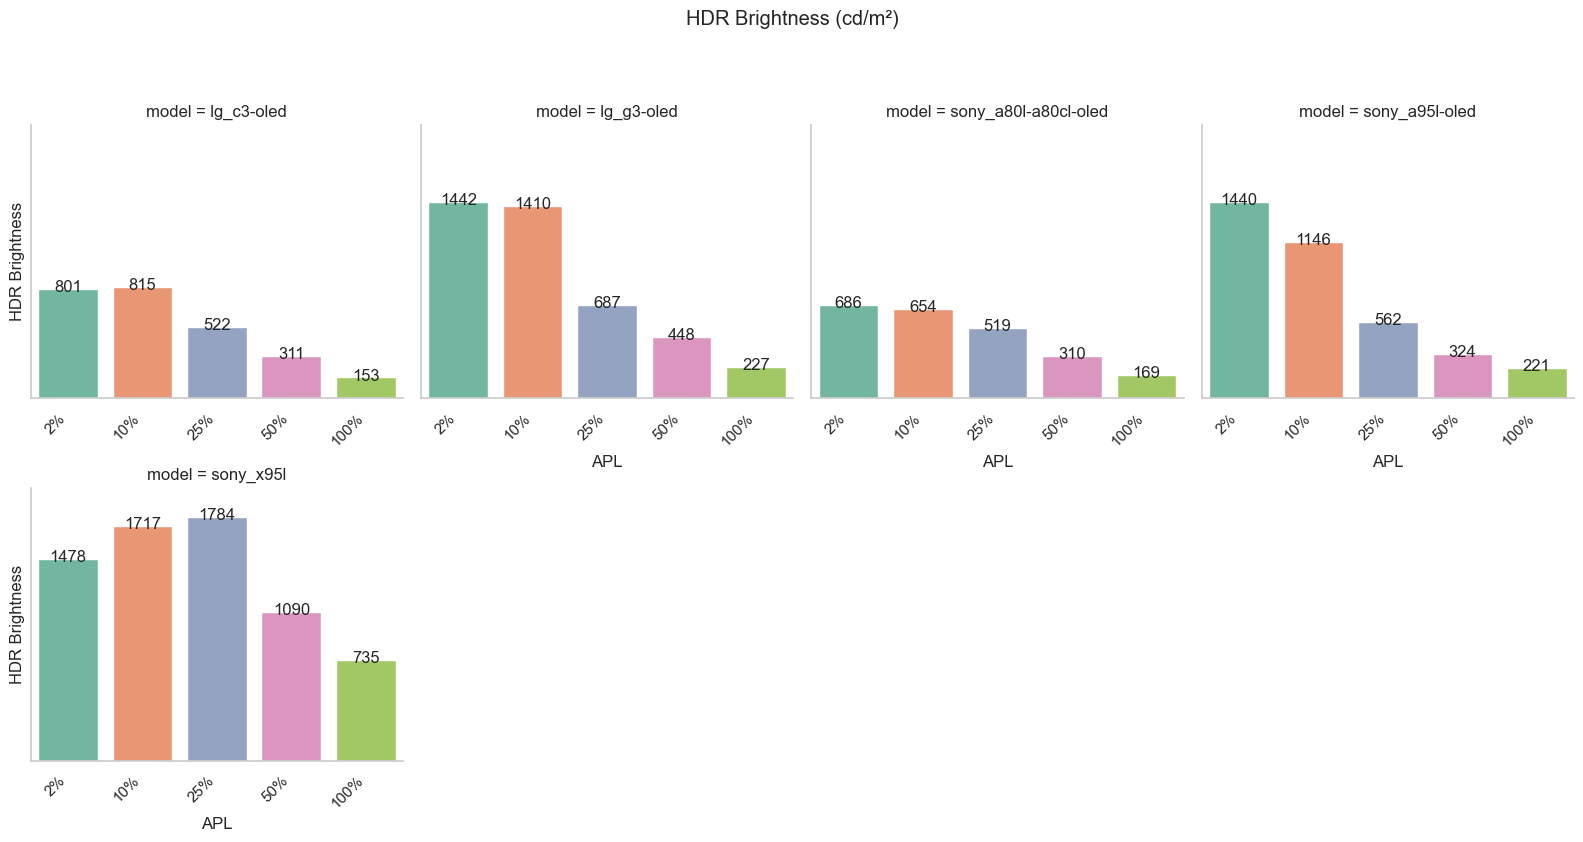

In [12]:
rvisualizer.plot_lines(target_col, yticks=yticks, ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims, swap_mode=True)

### HDR Brightness In Game Mod

In [13]:
target_col = 'HDR Brightness In Game Mode'
yticks = [200,500,1000,1500]
ylims = (0, 2000)

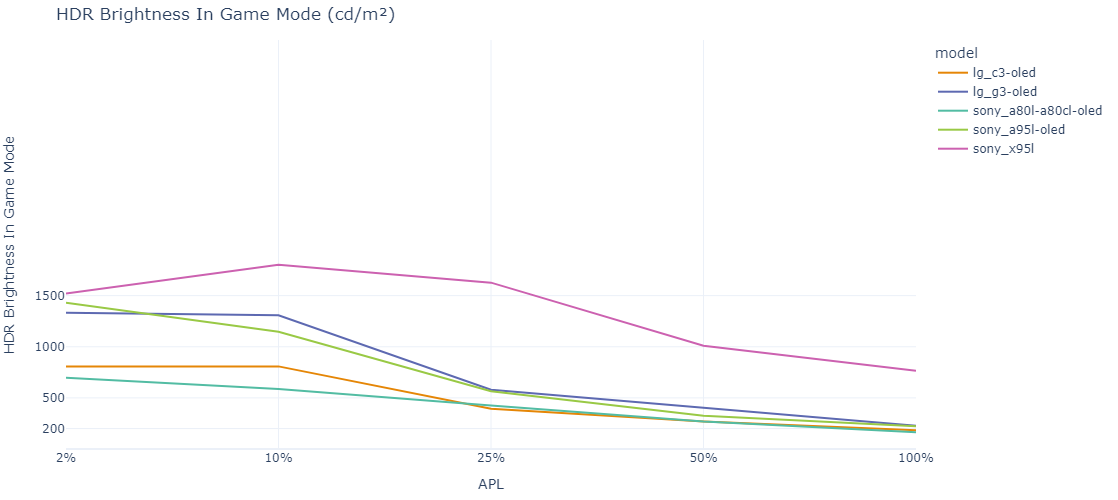

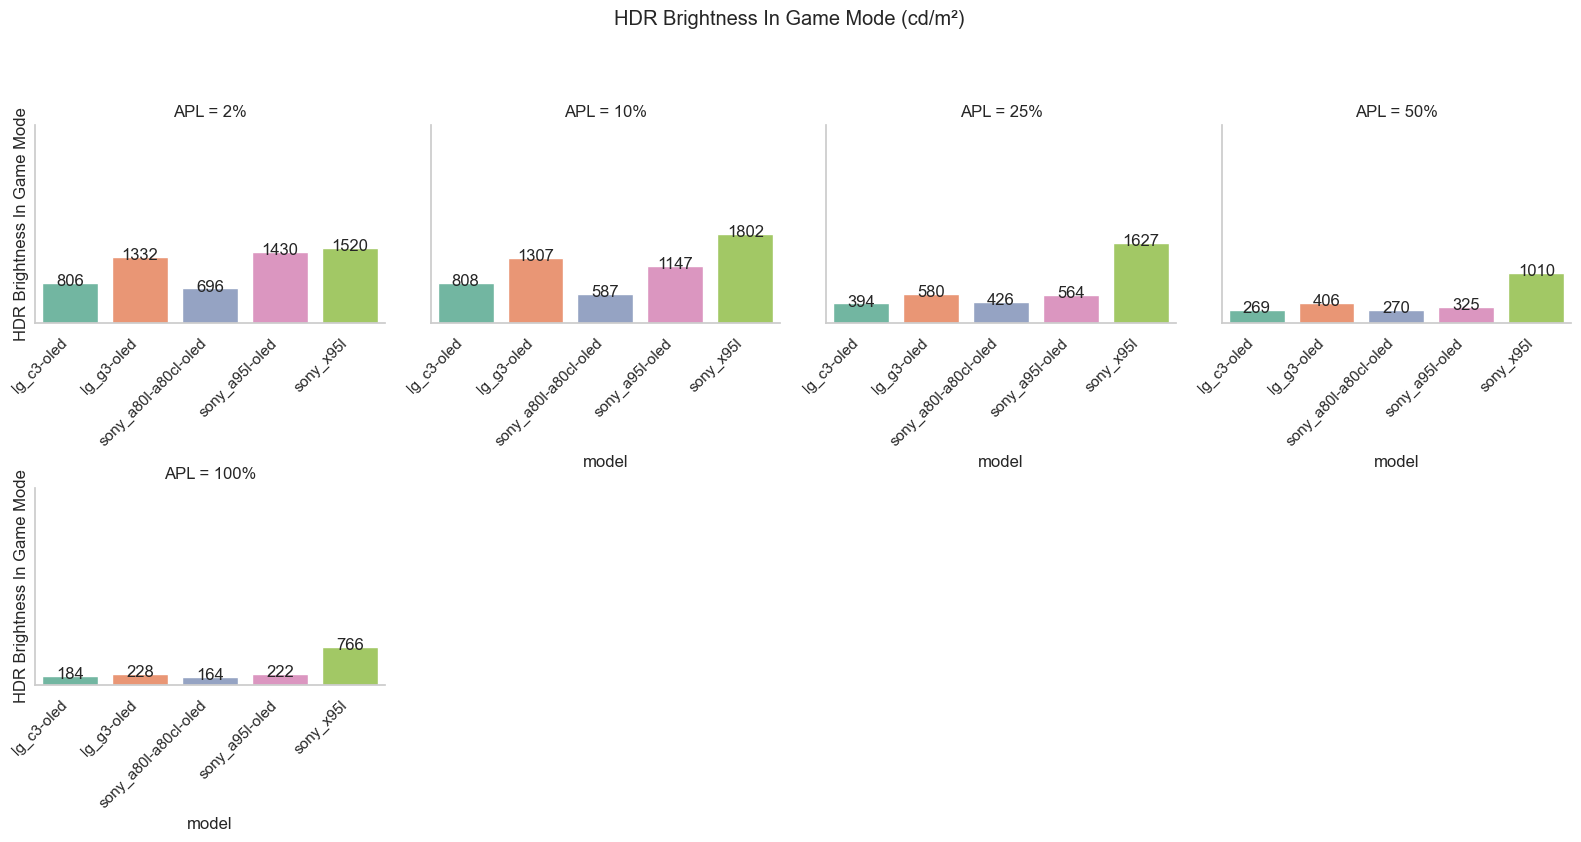

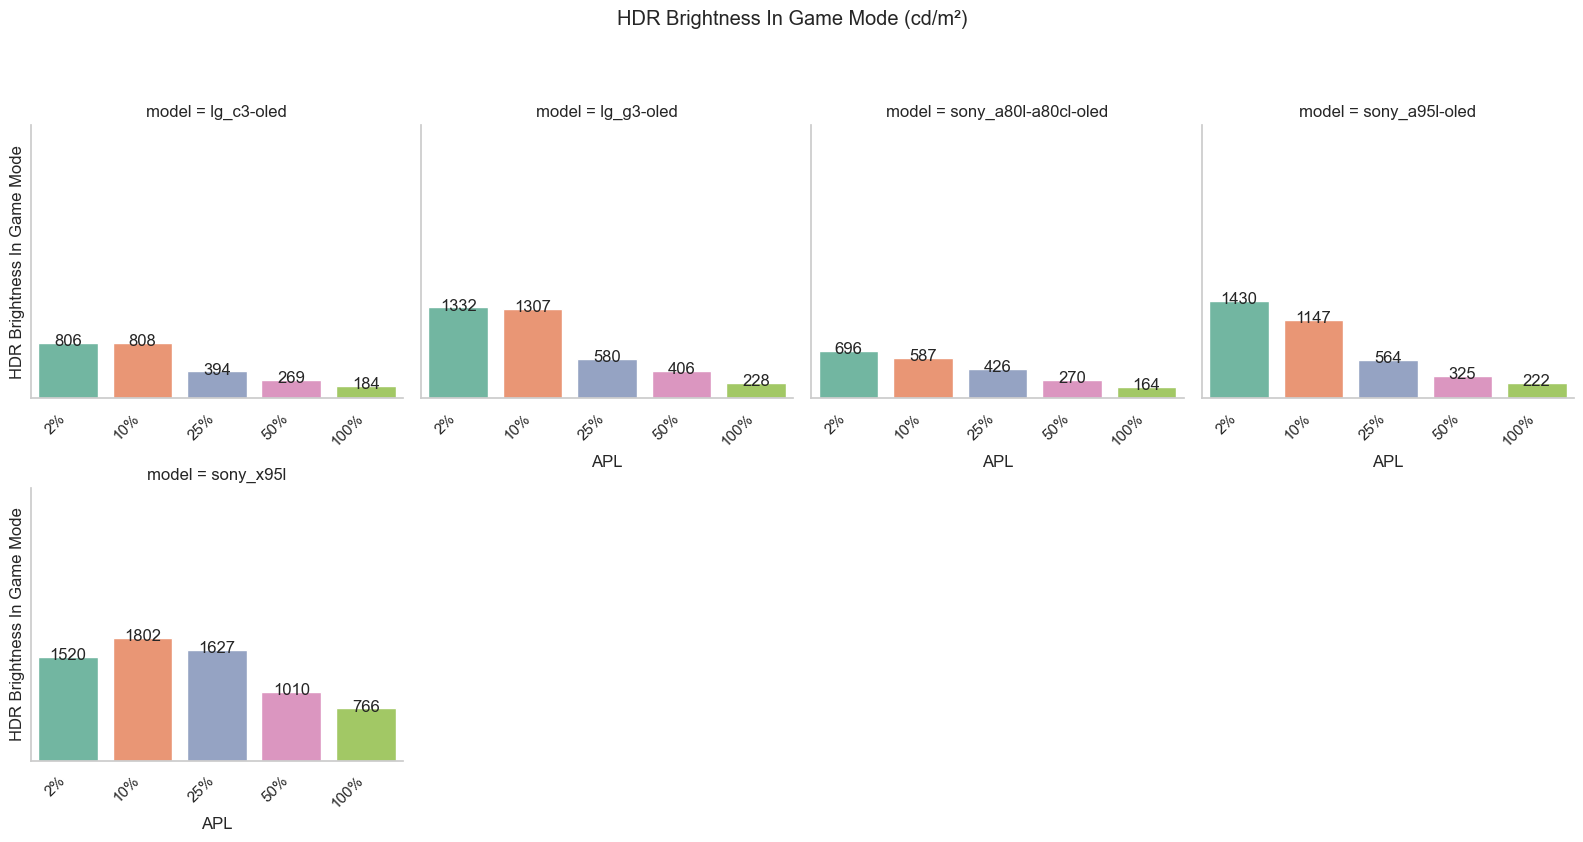

In [14]:
rvisualizer.plot_lines(target_col,yticks=yticks,ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims, swap_mode=True)

### SDR Brightness

In [15]:
target_col = 'SDR Brightness'
yticks = [200,500,1000,1500]
ylims = (0, 2000)

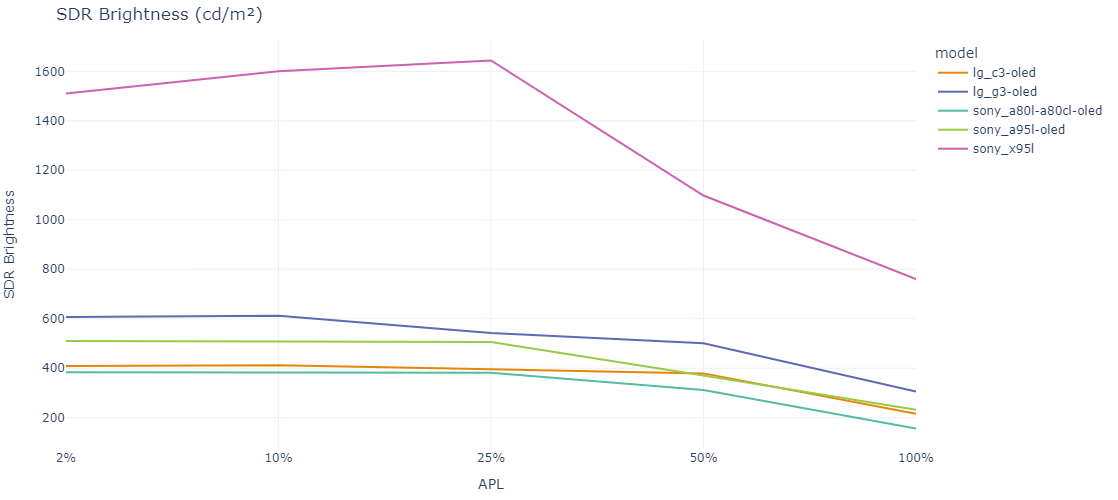

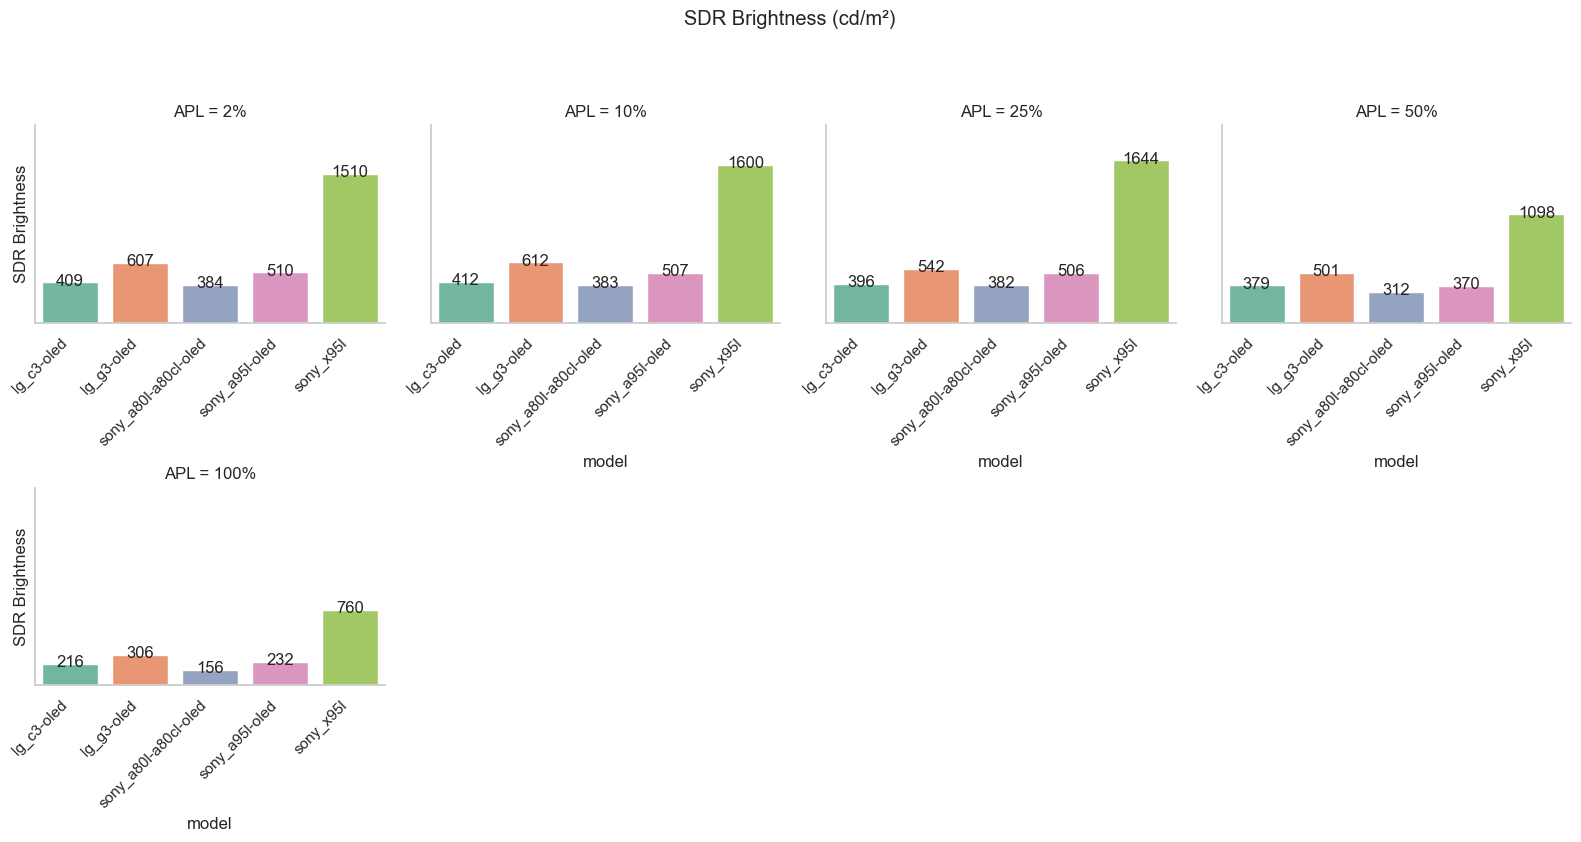

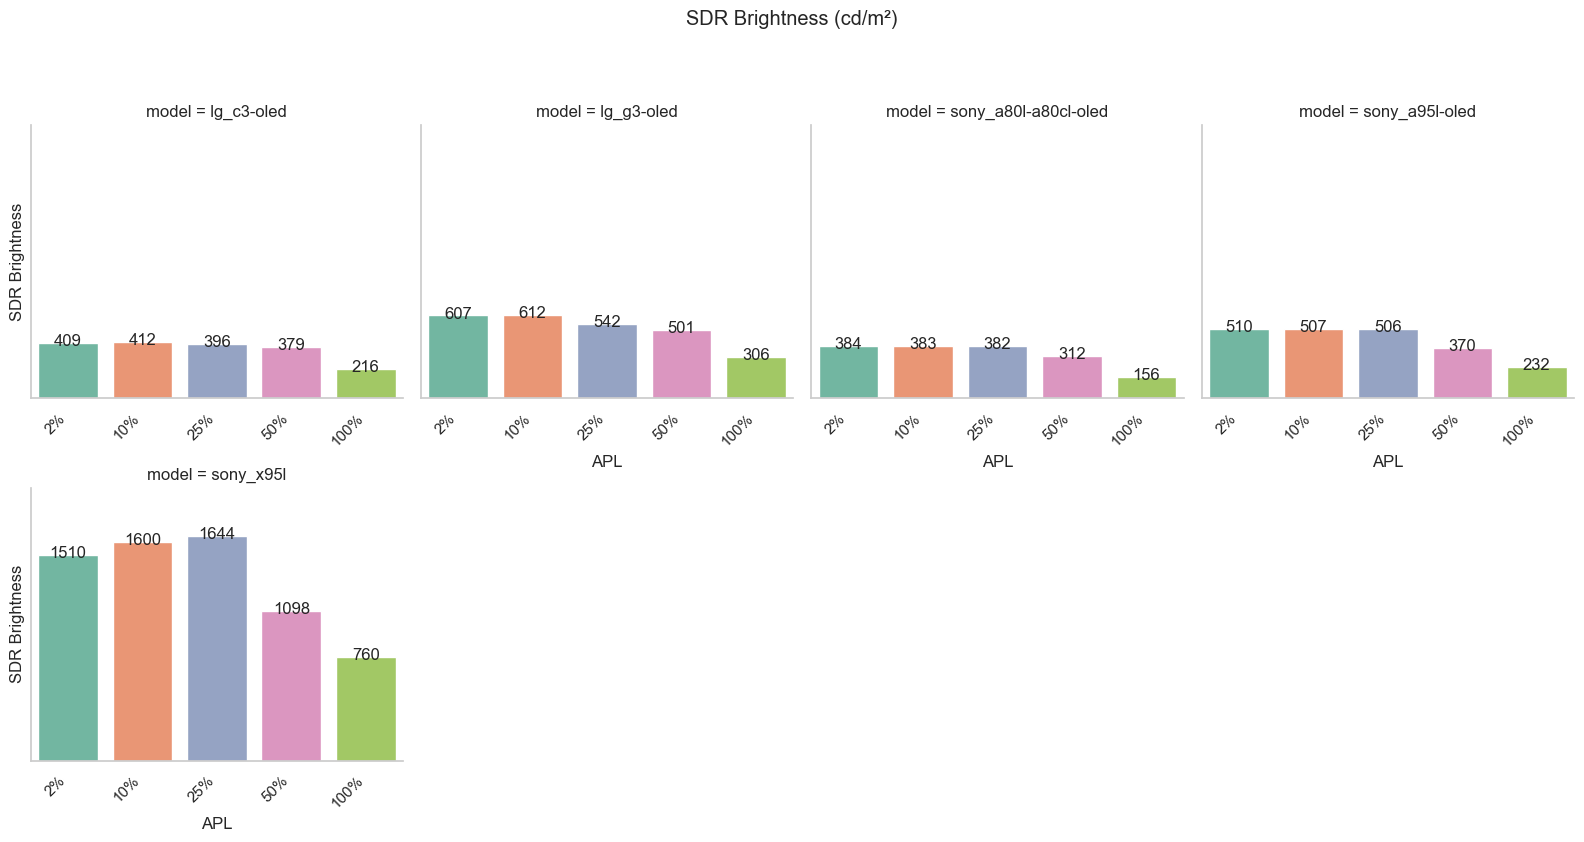

In [16]:
rvisualizer.plot_lines(target_col)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims, swap_mode=True)

### Color Volume

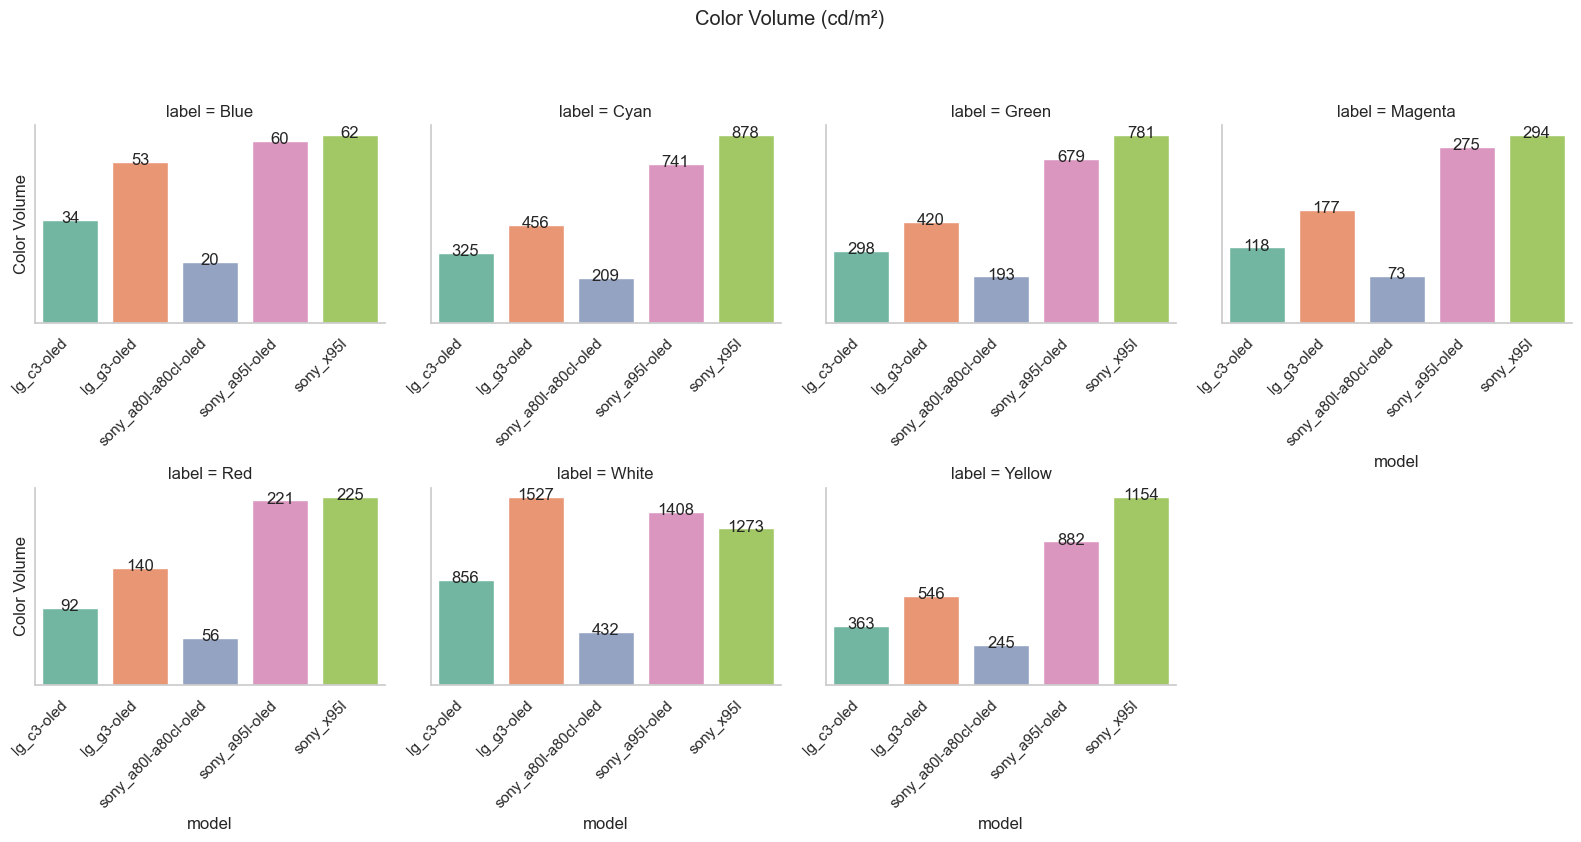

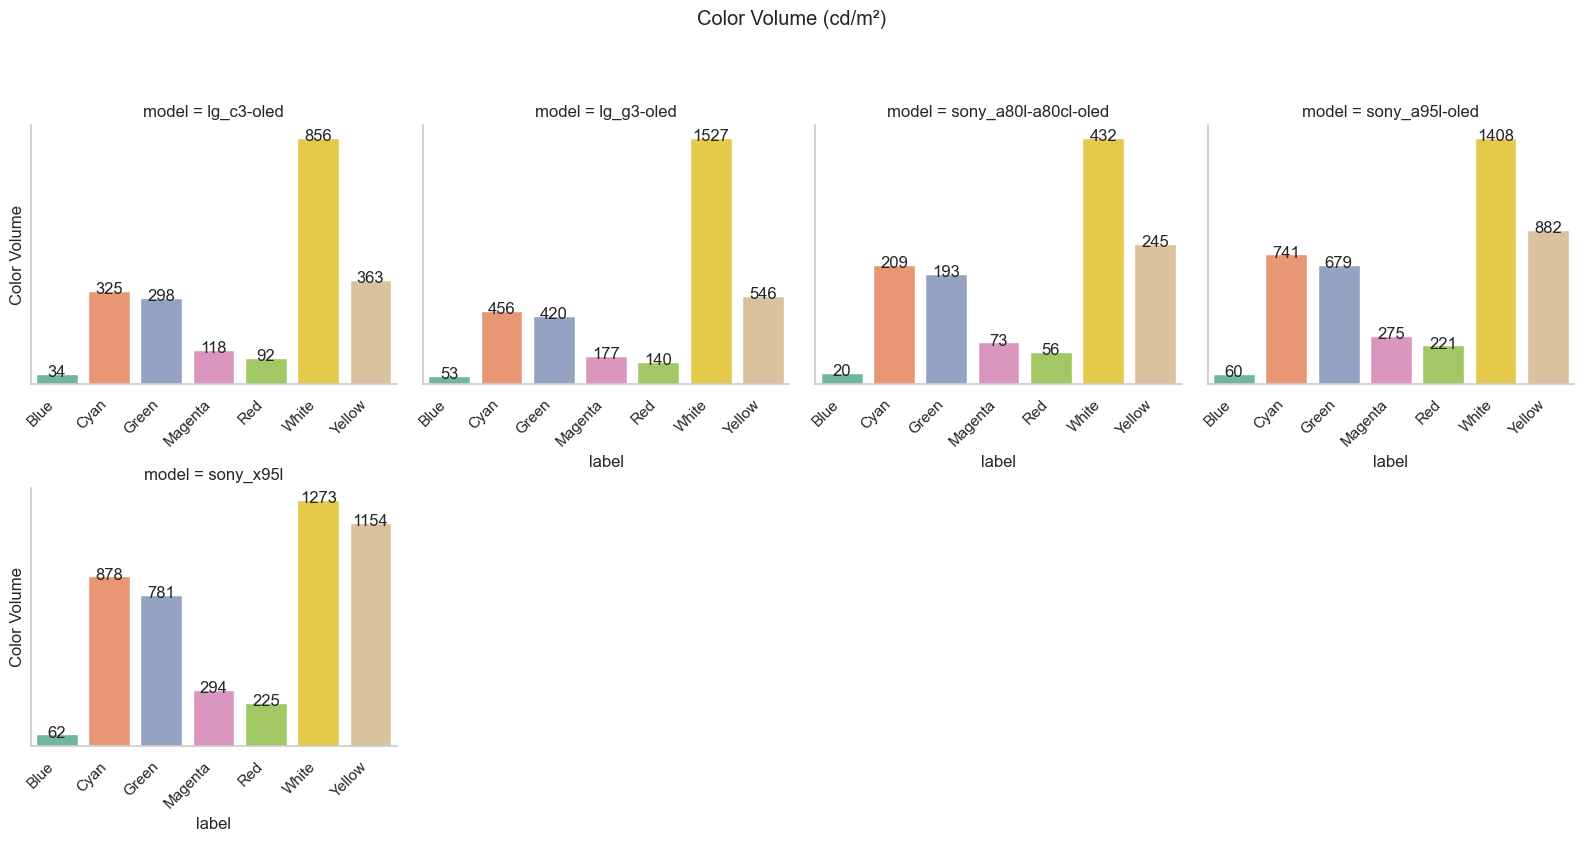

In [17]:
target_col = 'Color Volume'
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

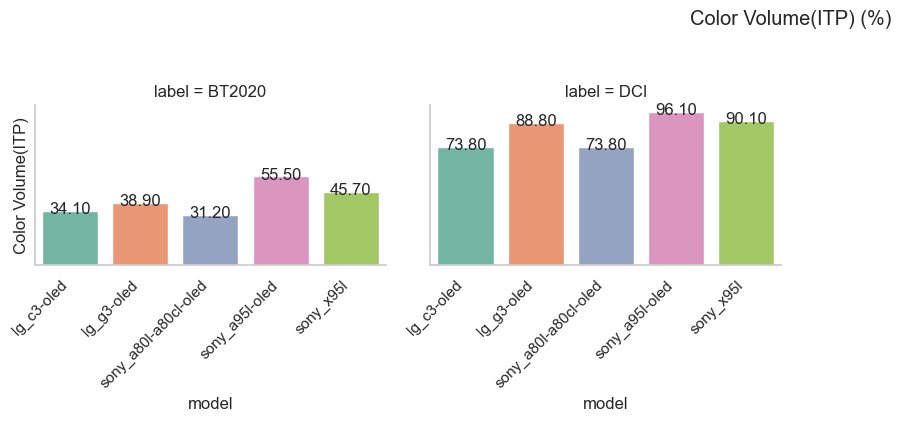

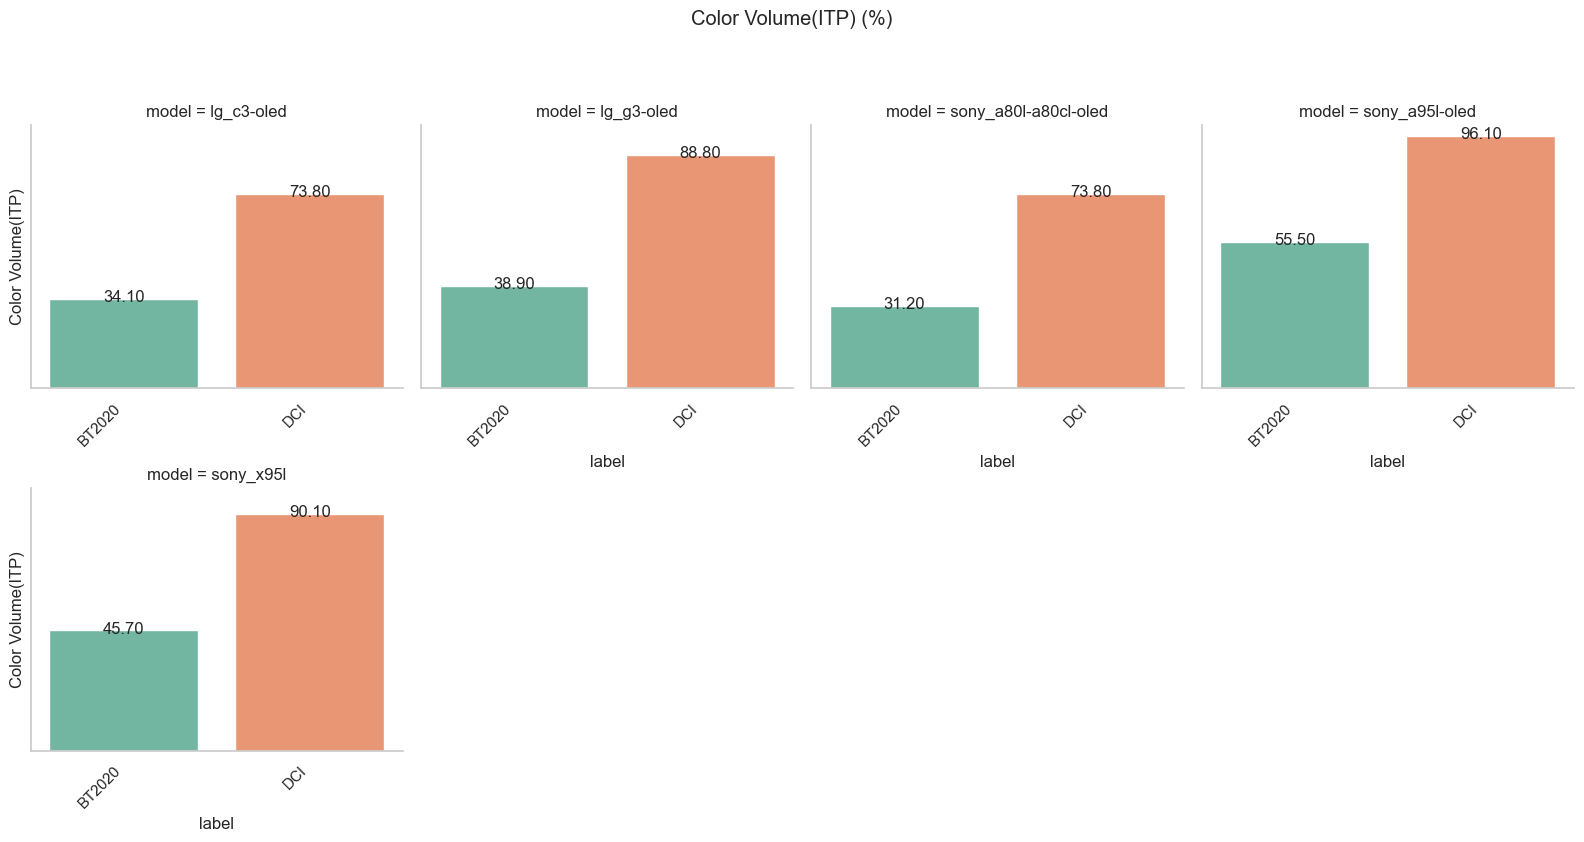

In [18]:
target_col = 'Color Volume(ITP)'
ylims = (0, 100)
rvisualizer.plotsns_facet_bar(target_col, facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_ylims=ylims, swap_mode=True)

### Color Gamut

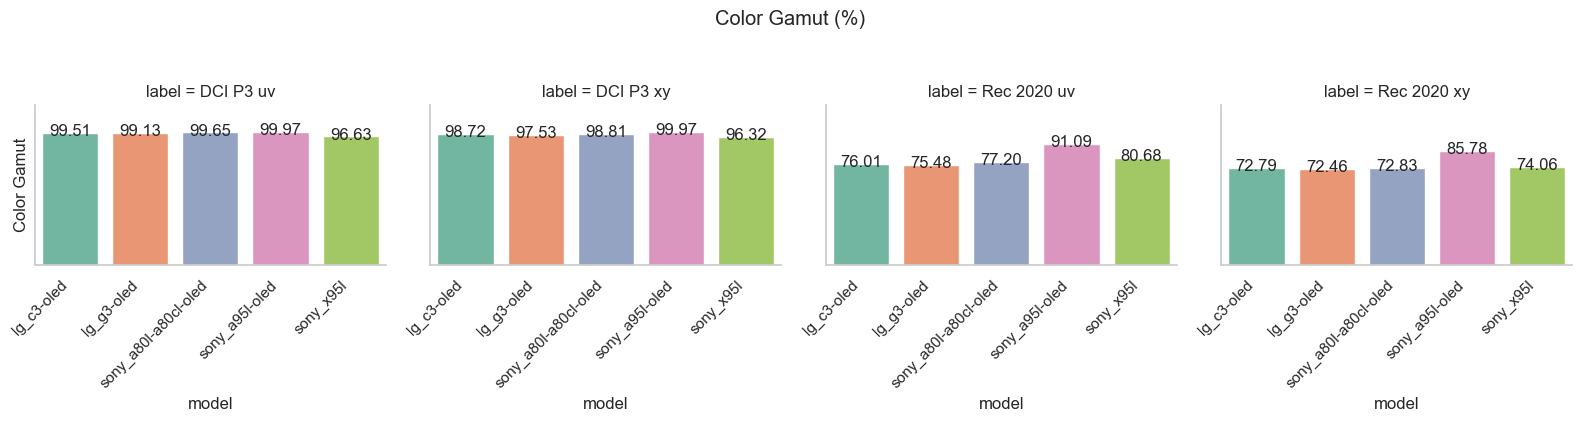

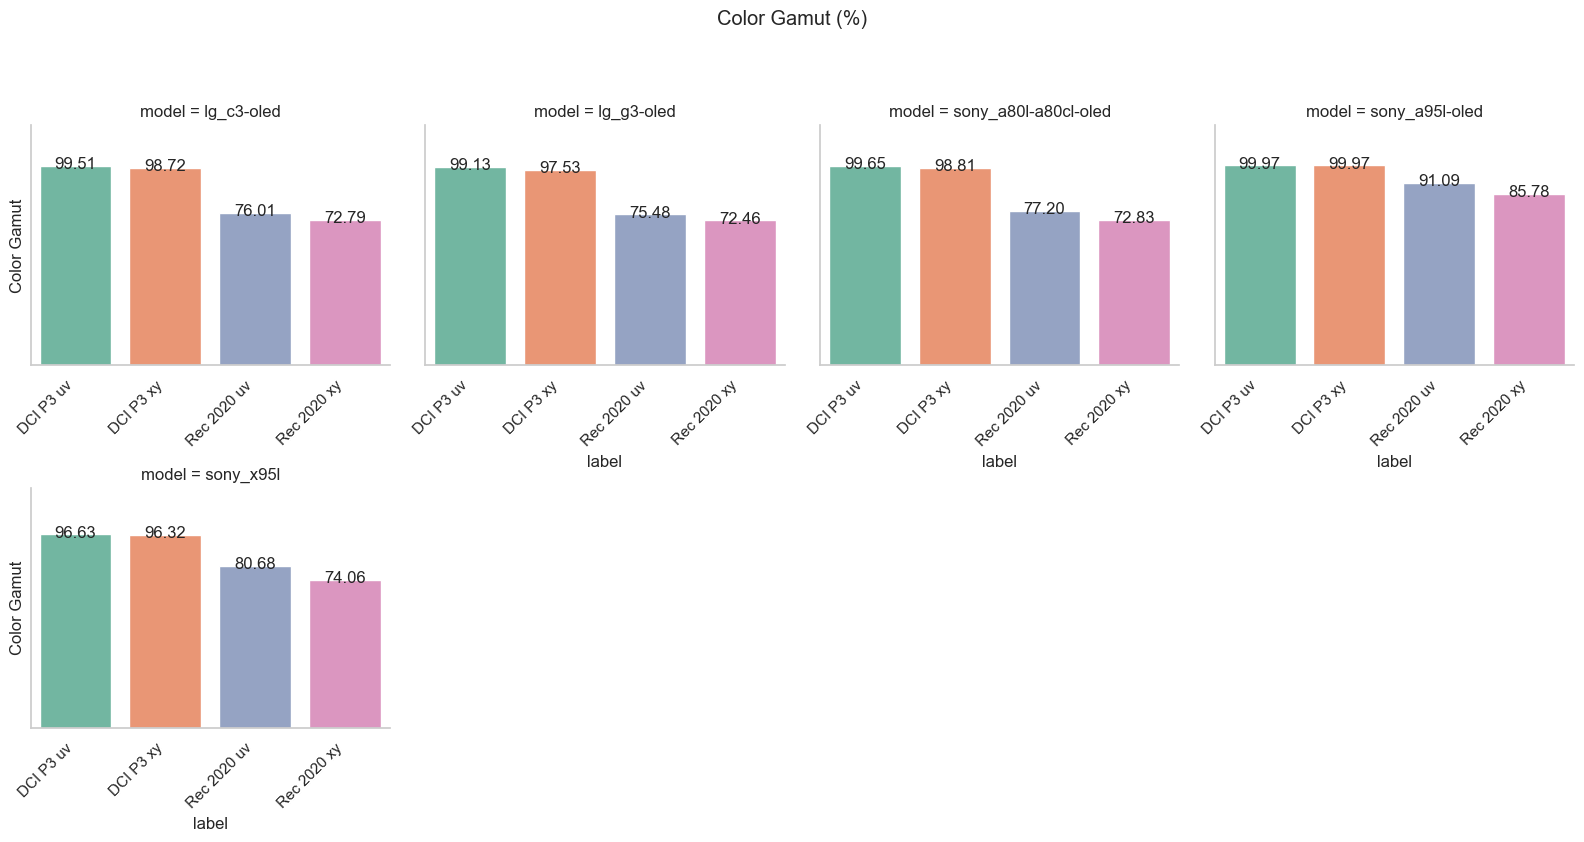

In [19]:
target_col = "Color Gamut"
ylims = (0, 120)
rvisualizer.plotsns_facet_bar(target_col,facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_ylims=ylims, swap_mode=True)

### Viewing Angle

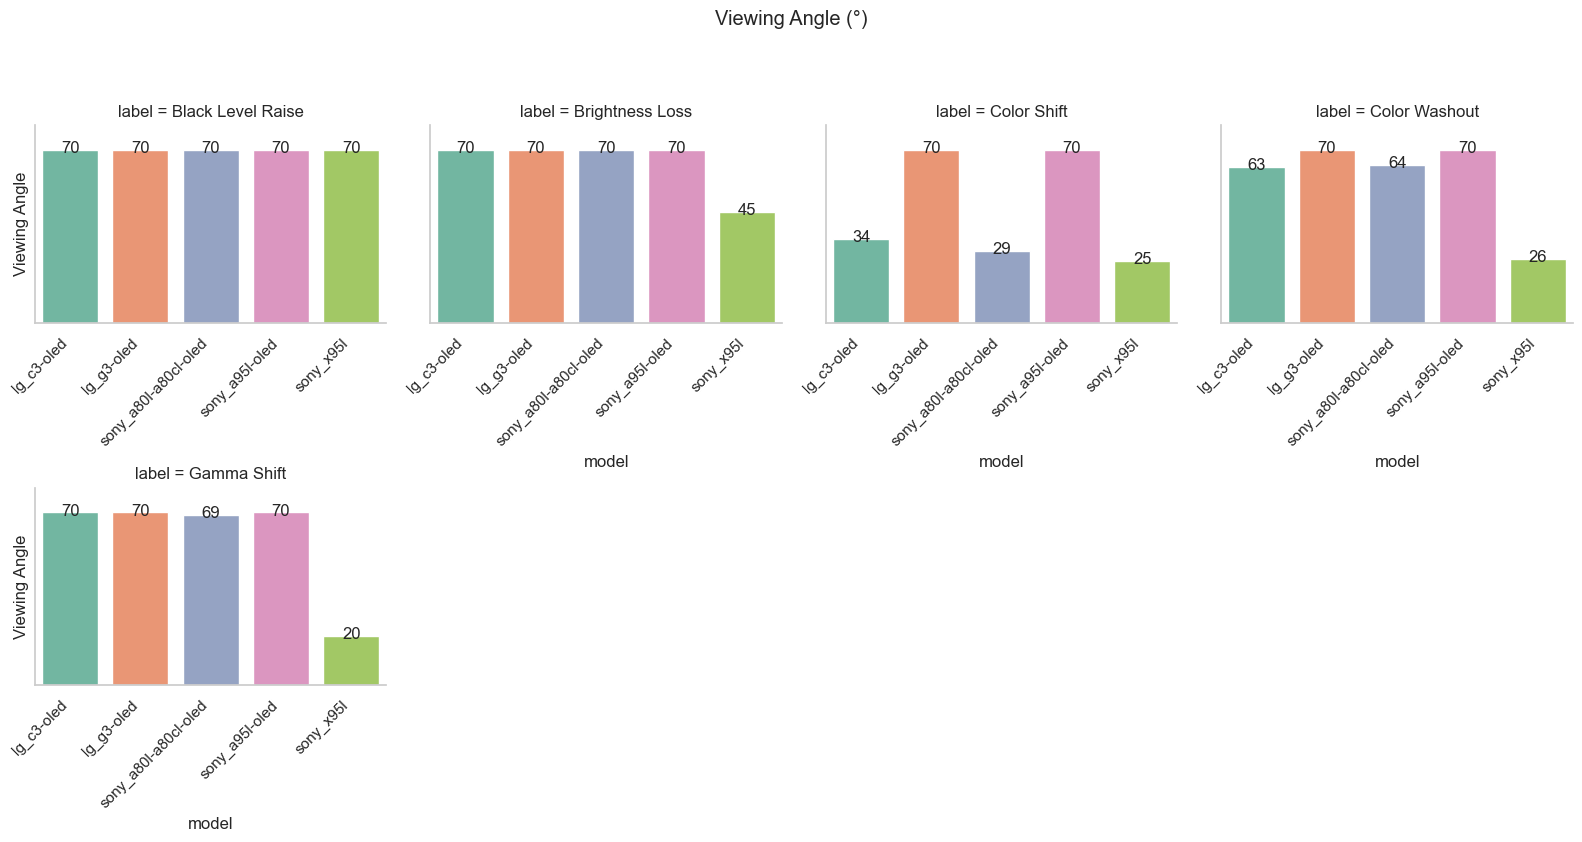

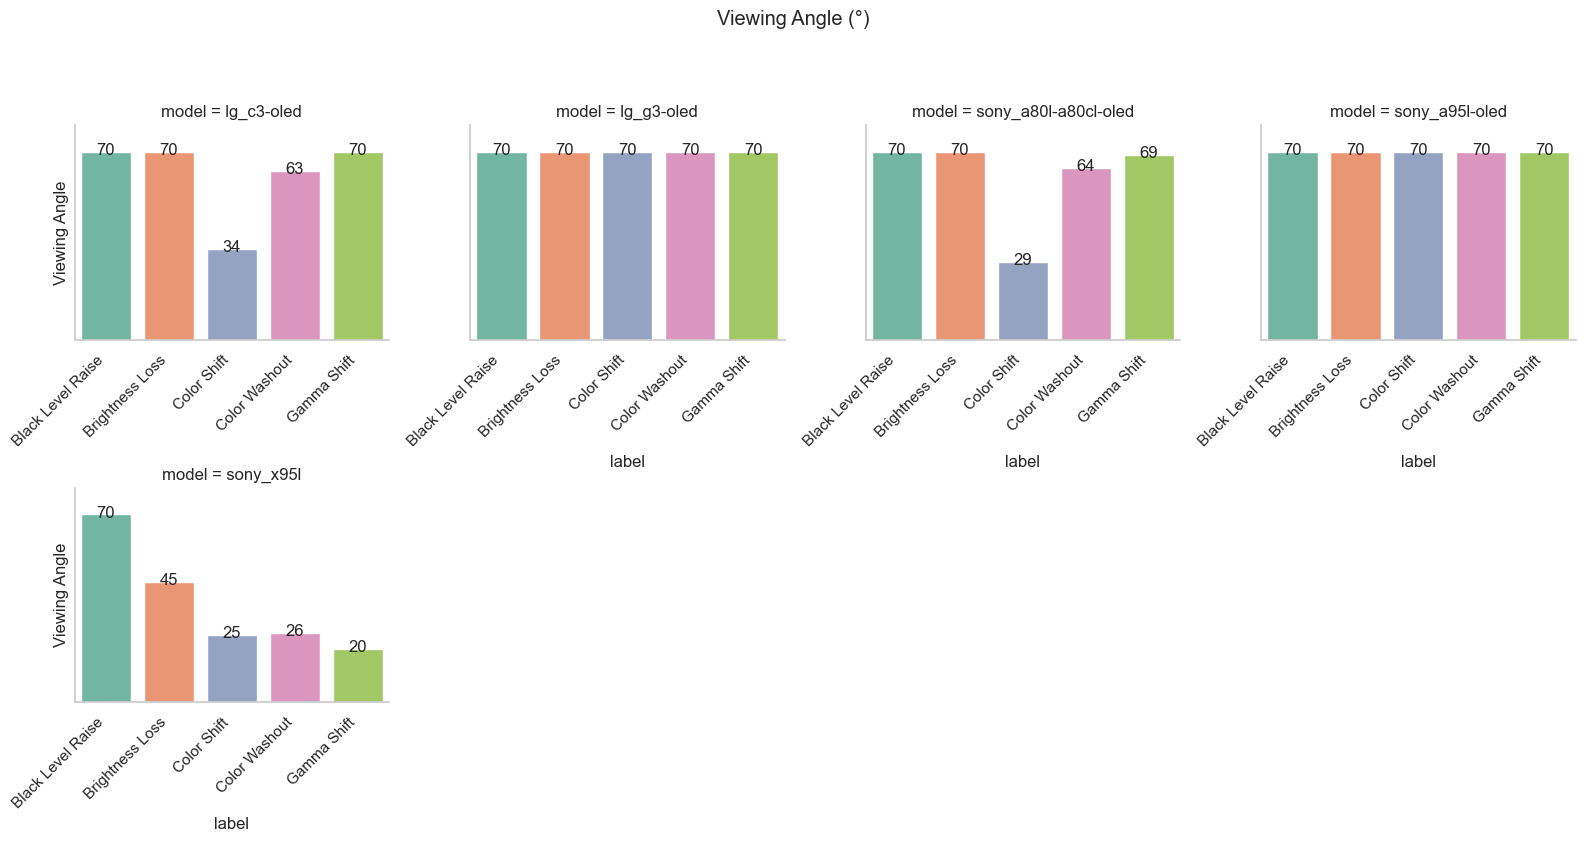

In [20]:
target_col = 'Viewing Angle'
ylims = (0, 80)
rvisualizer.plotsns_facet_bar(target_col, facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_ylims=ylims, swap_mode=True)

### Contrast

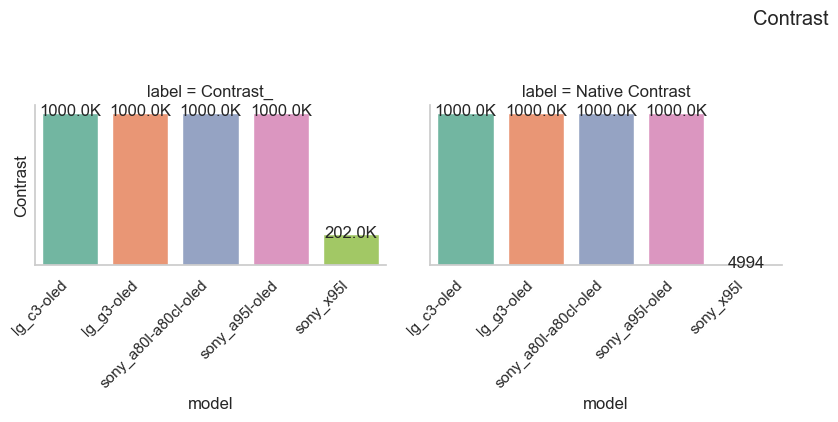

In [21]:
target_col = 'Contrast'
rvisualizer.plotsns_facet_bar(target_col)

### Pre Calibration

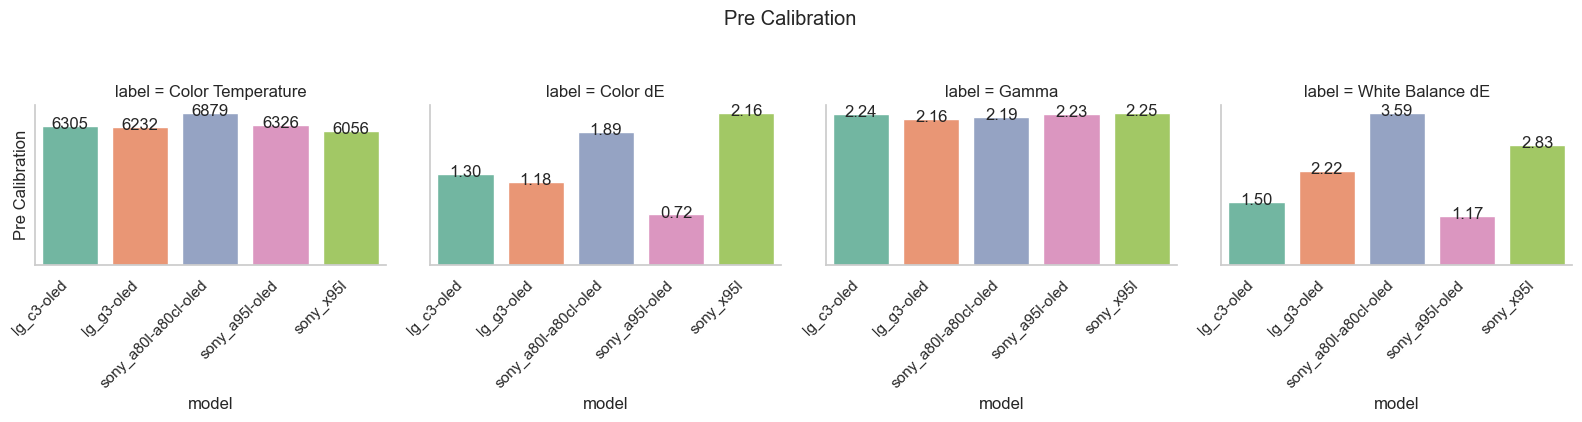

In [22]:
target_col = "Pre Calibration"
rvisualizer.plotsns_facet_bar(target_col)

### Post Calibration

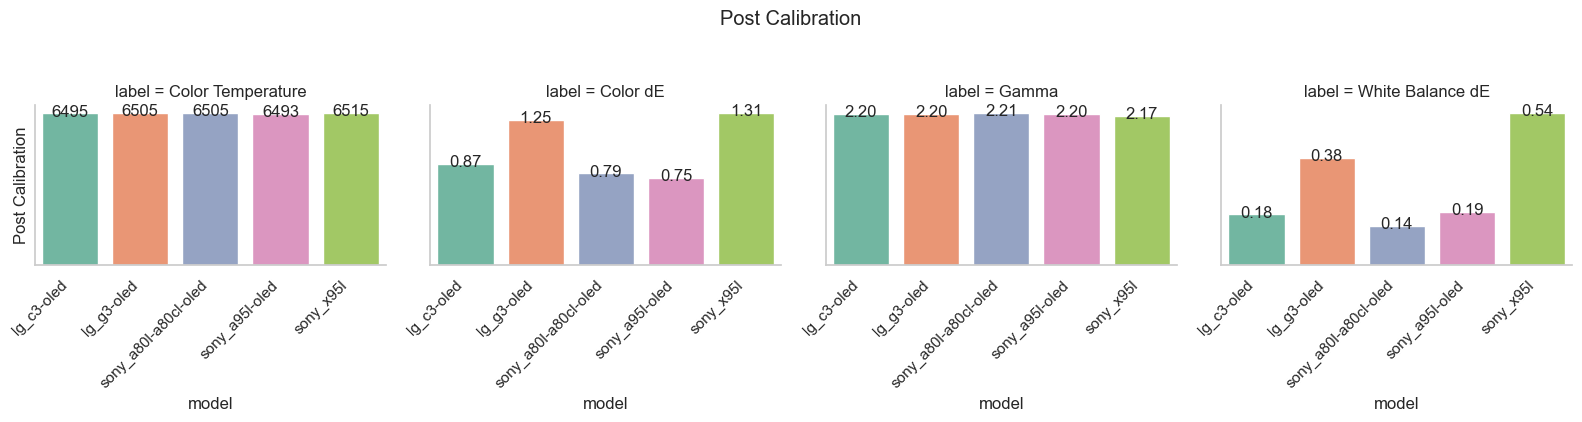

In [23]:
target_col = "Post Calibration"
rvisualizer.plotsns_facet_bar(target_col)

### PQ EOTF Tracking

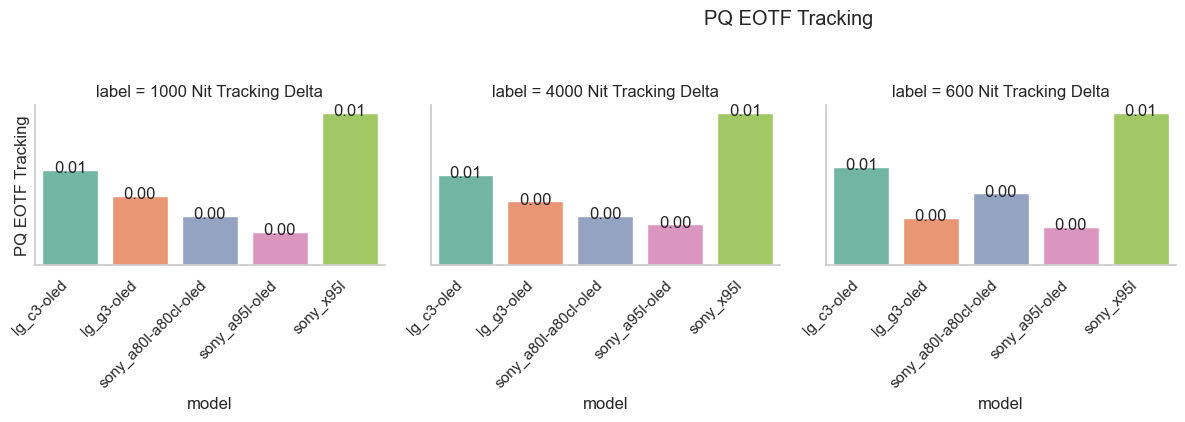

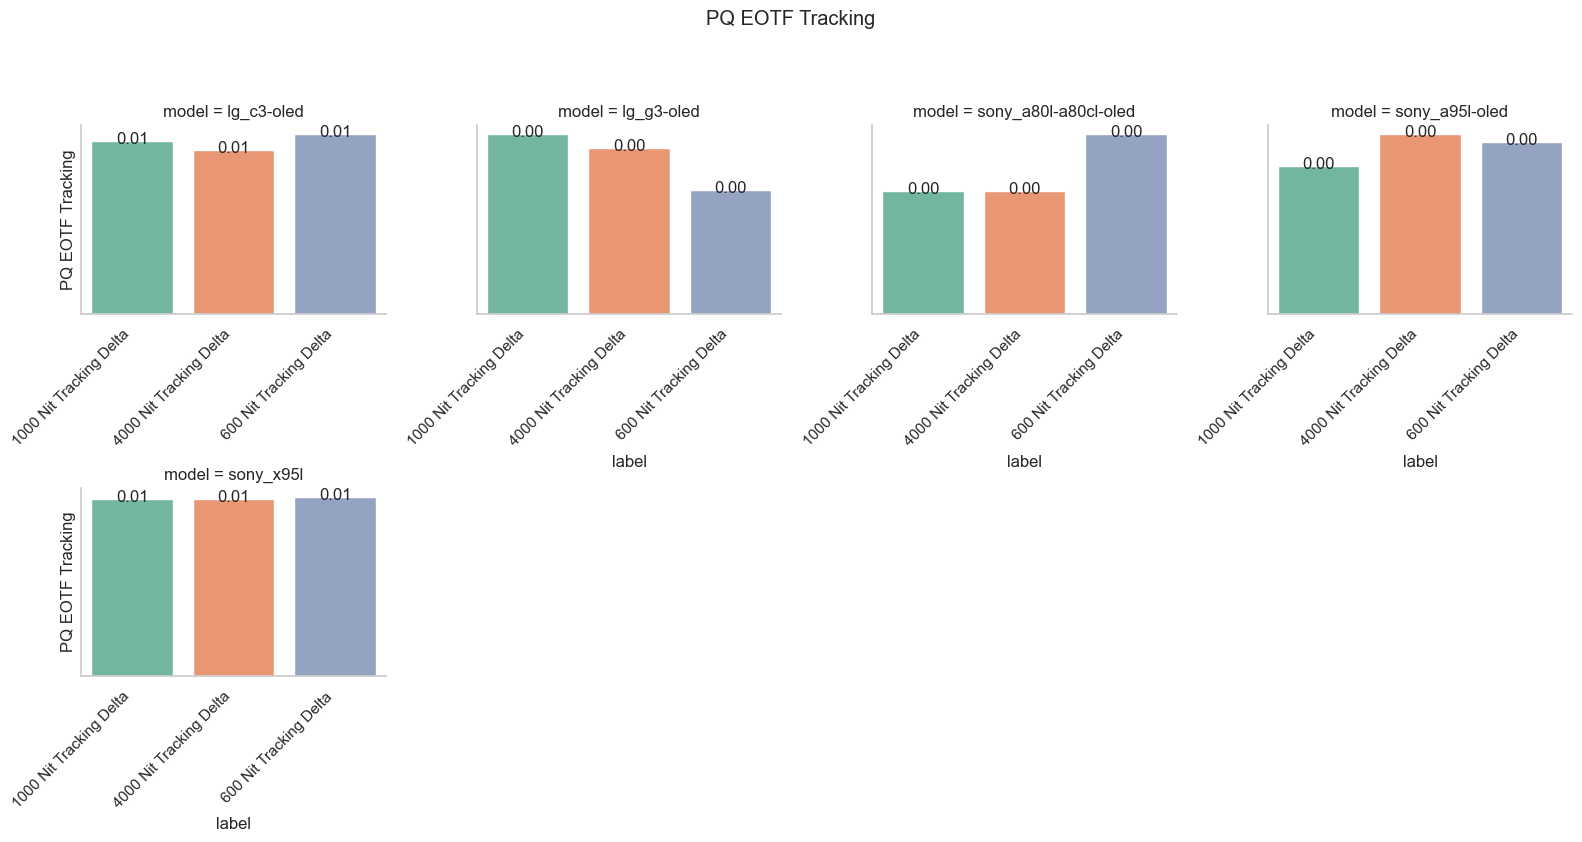

In [24]:
target_col = "PQ EOTF Tracking"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Reflections

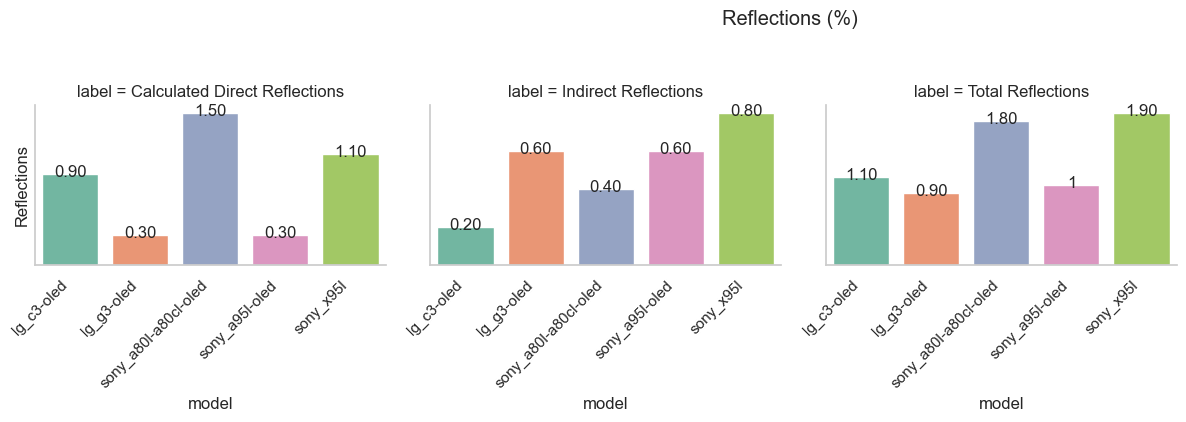

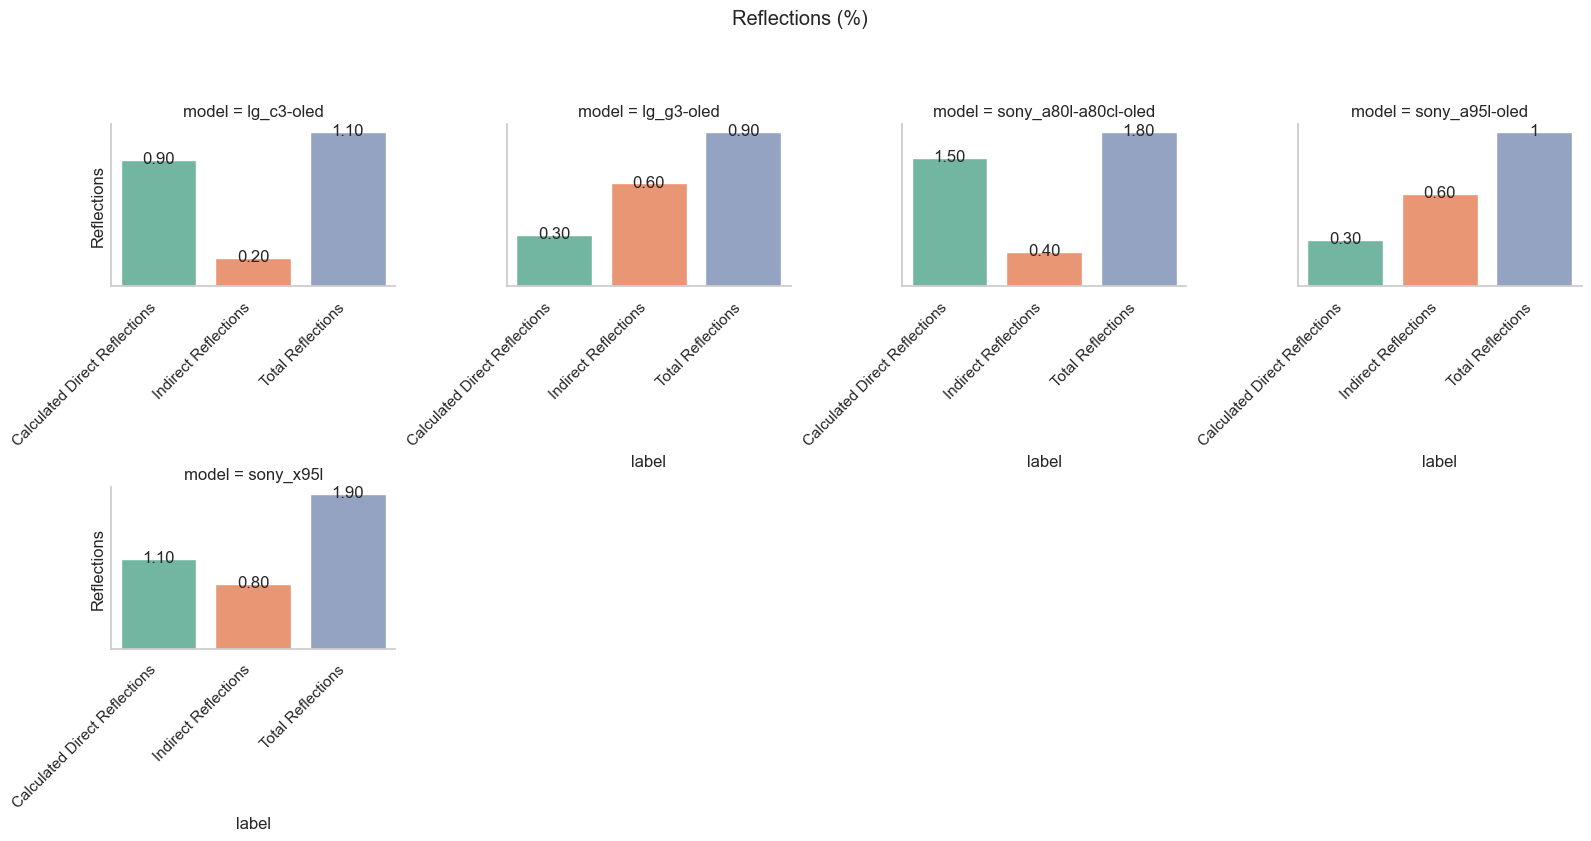

In [25]:
target_col = "Reflections"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### HDR Native Gradient

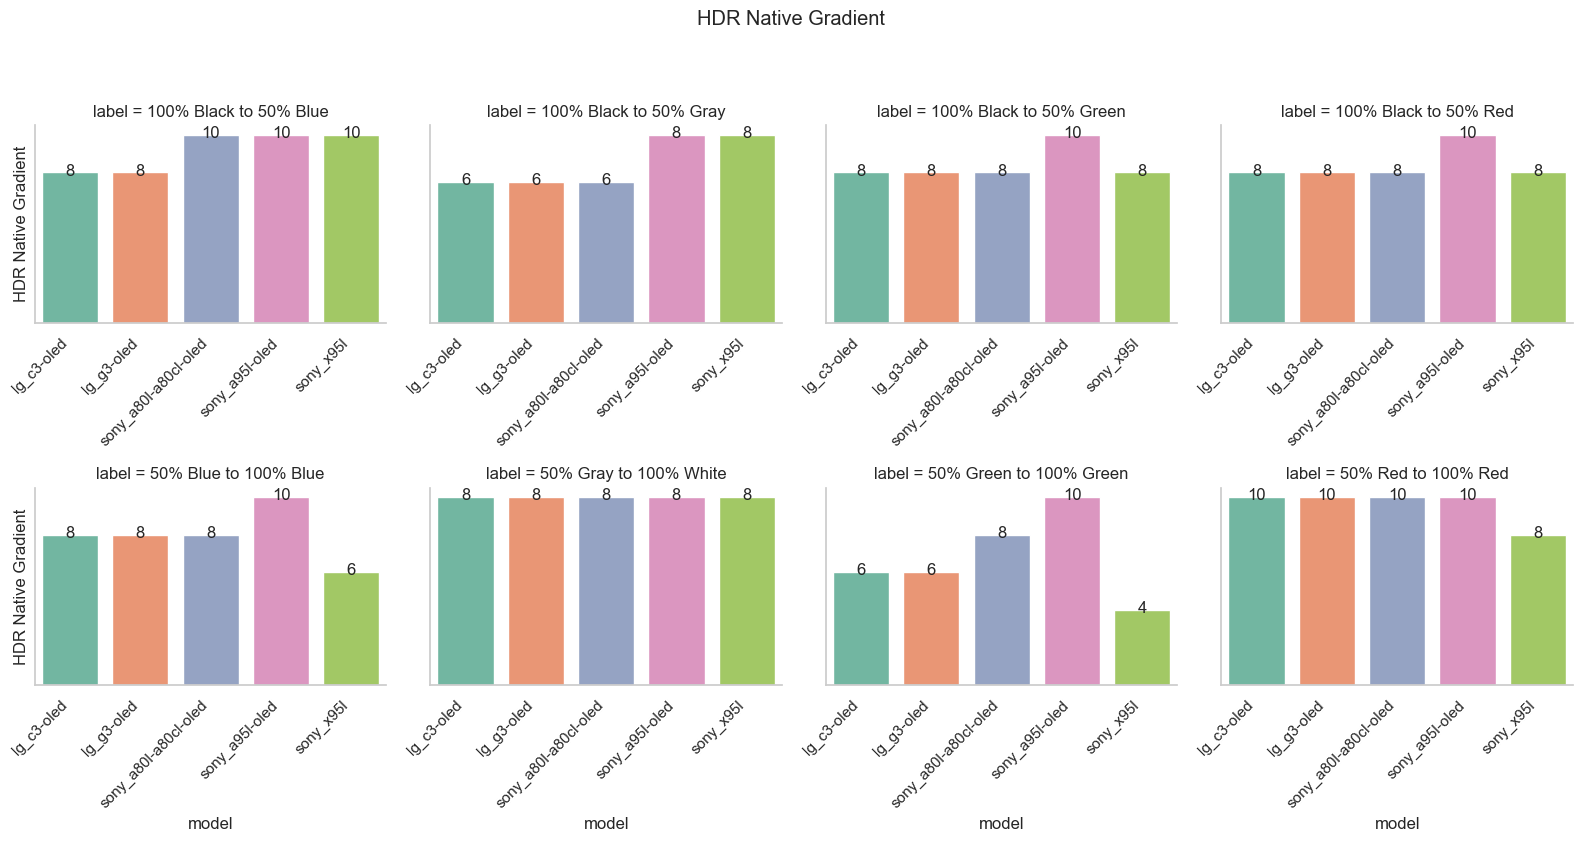

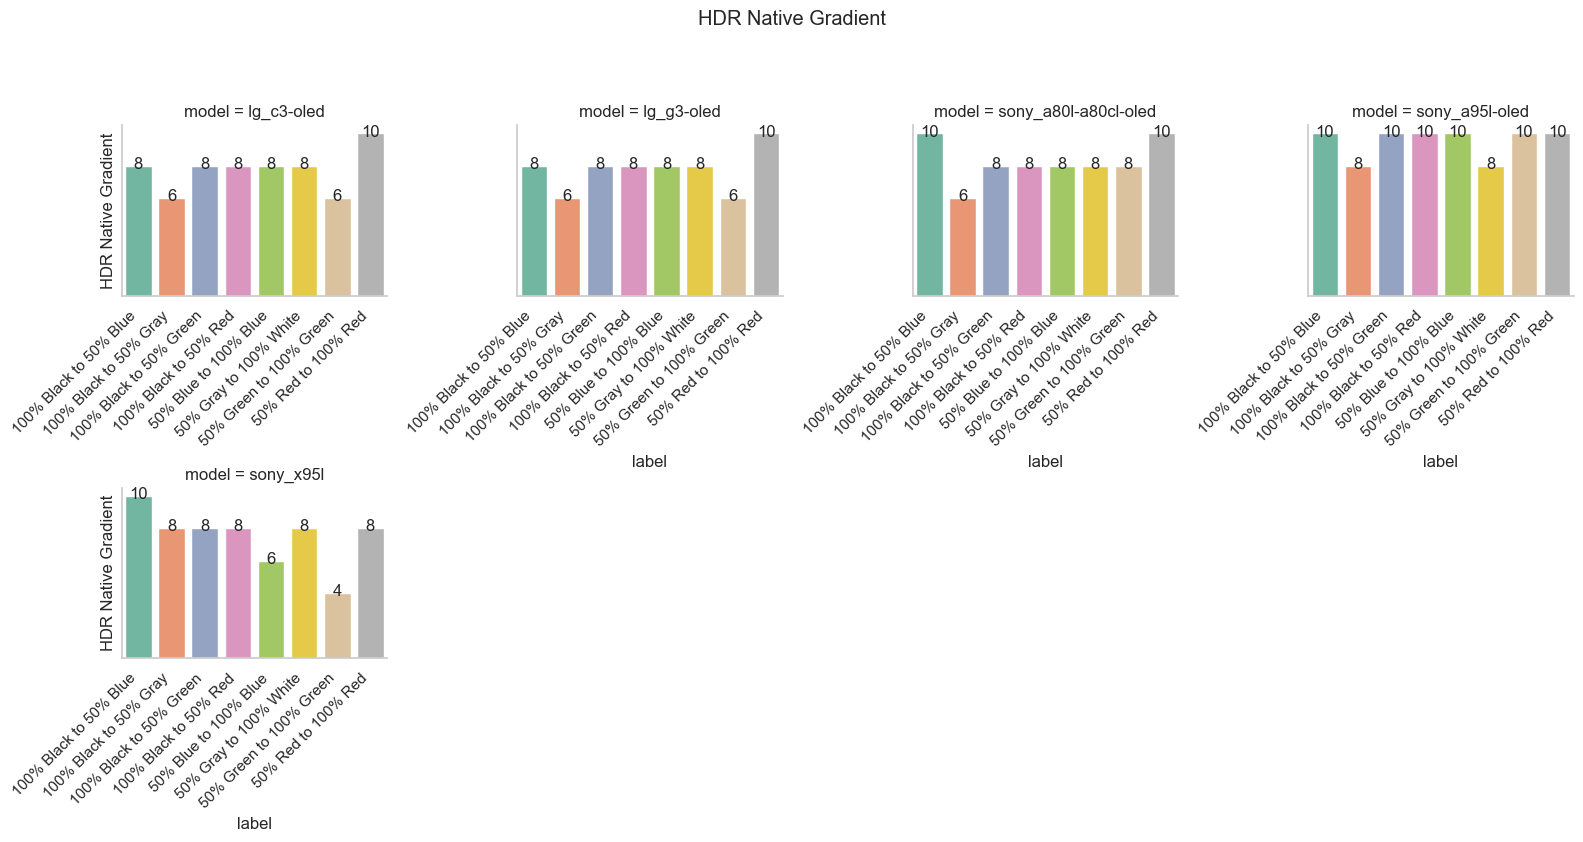

In [26]:
target_col = "HDR Native Gradient"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Low-Quality Content Smoothing

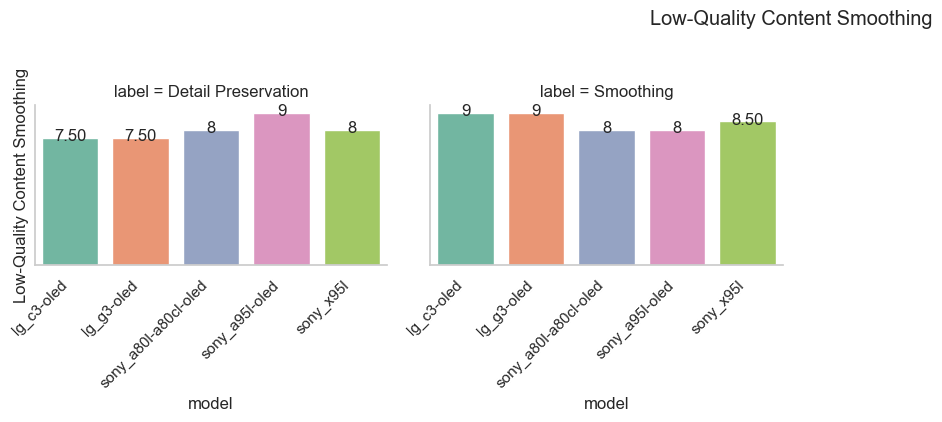

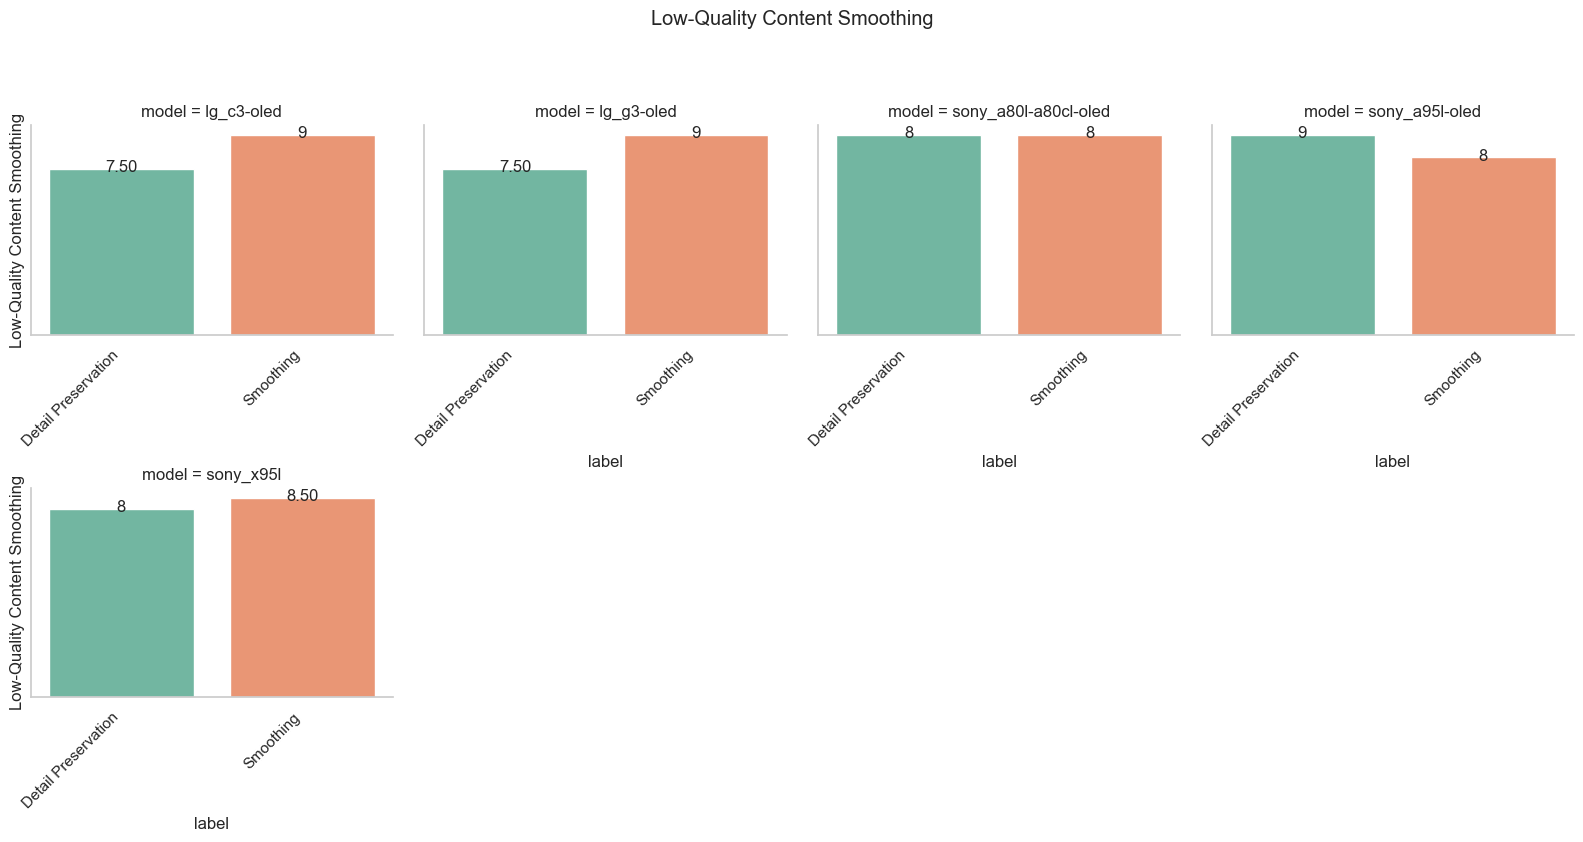

In [27]:
target_col = "Low-Quality Content Smoothing"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Gray Uniformity

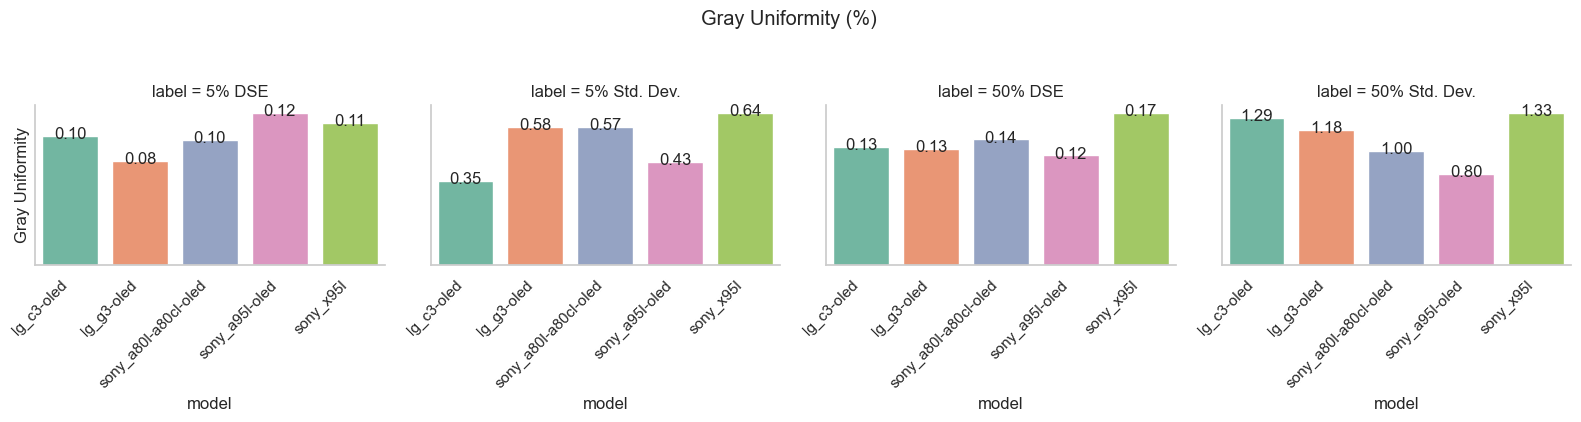

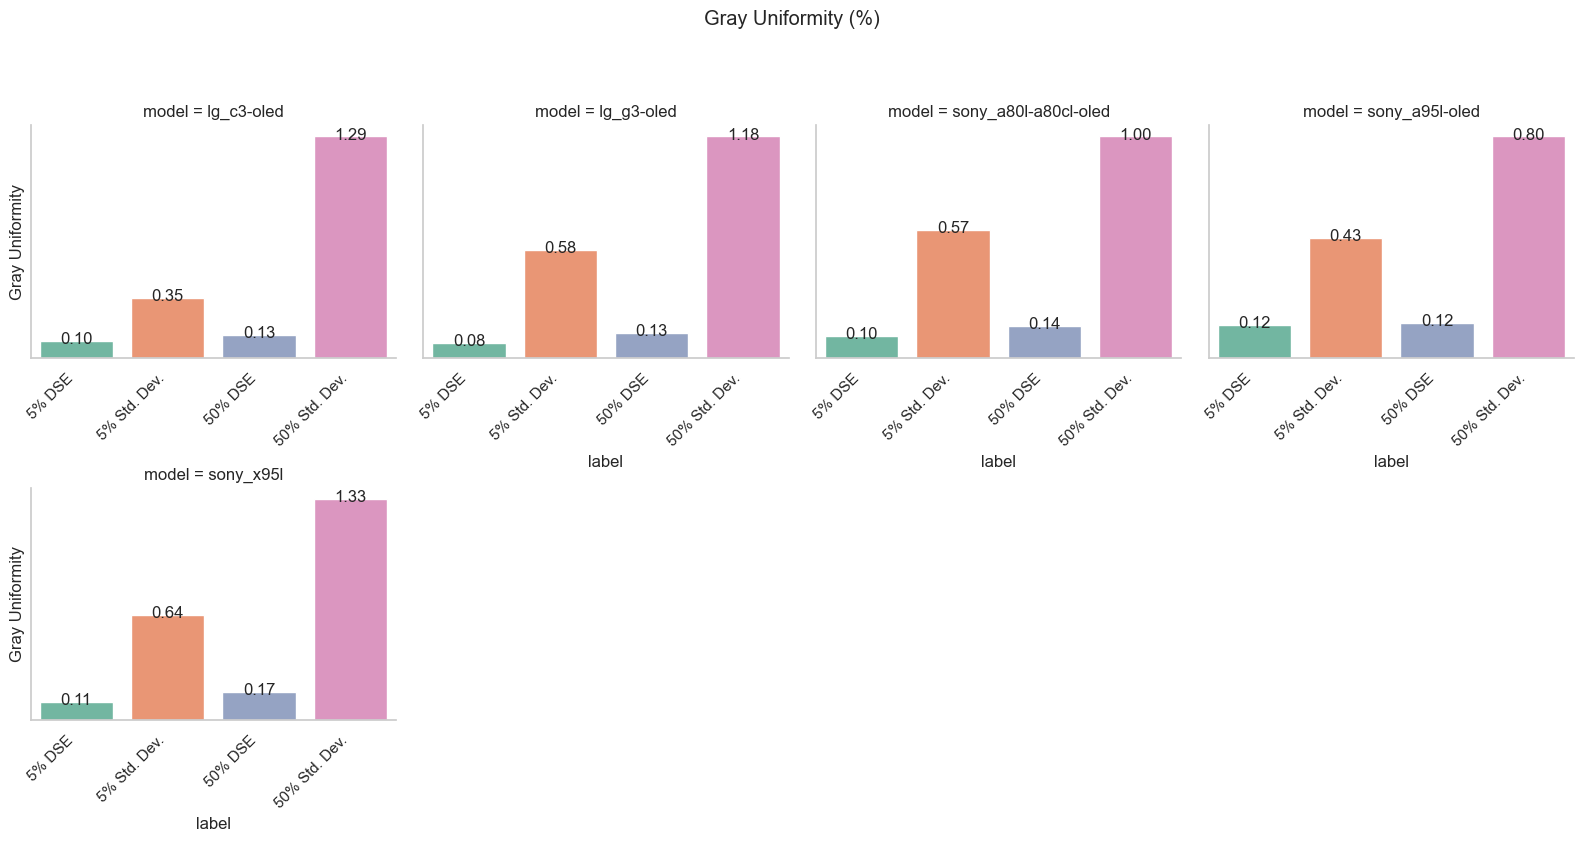

In [28]:
target_col = "Gray Uniformity"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Black Uniformity

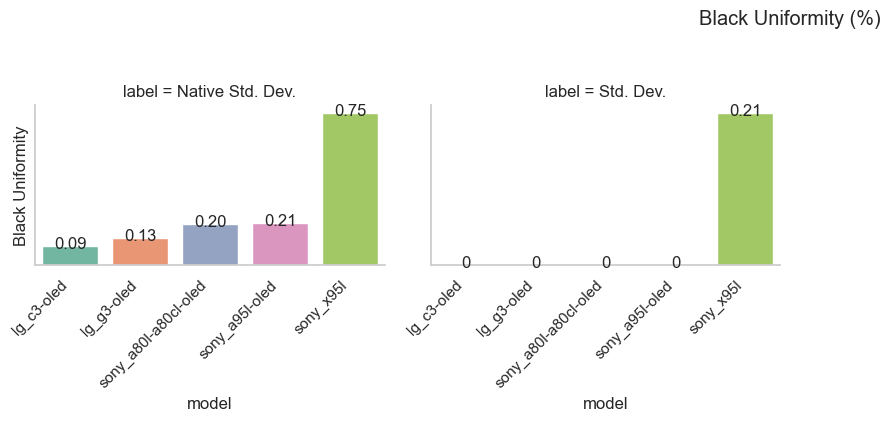

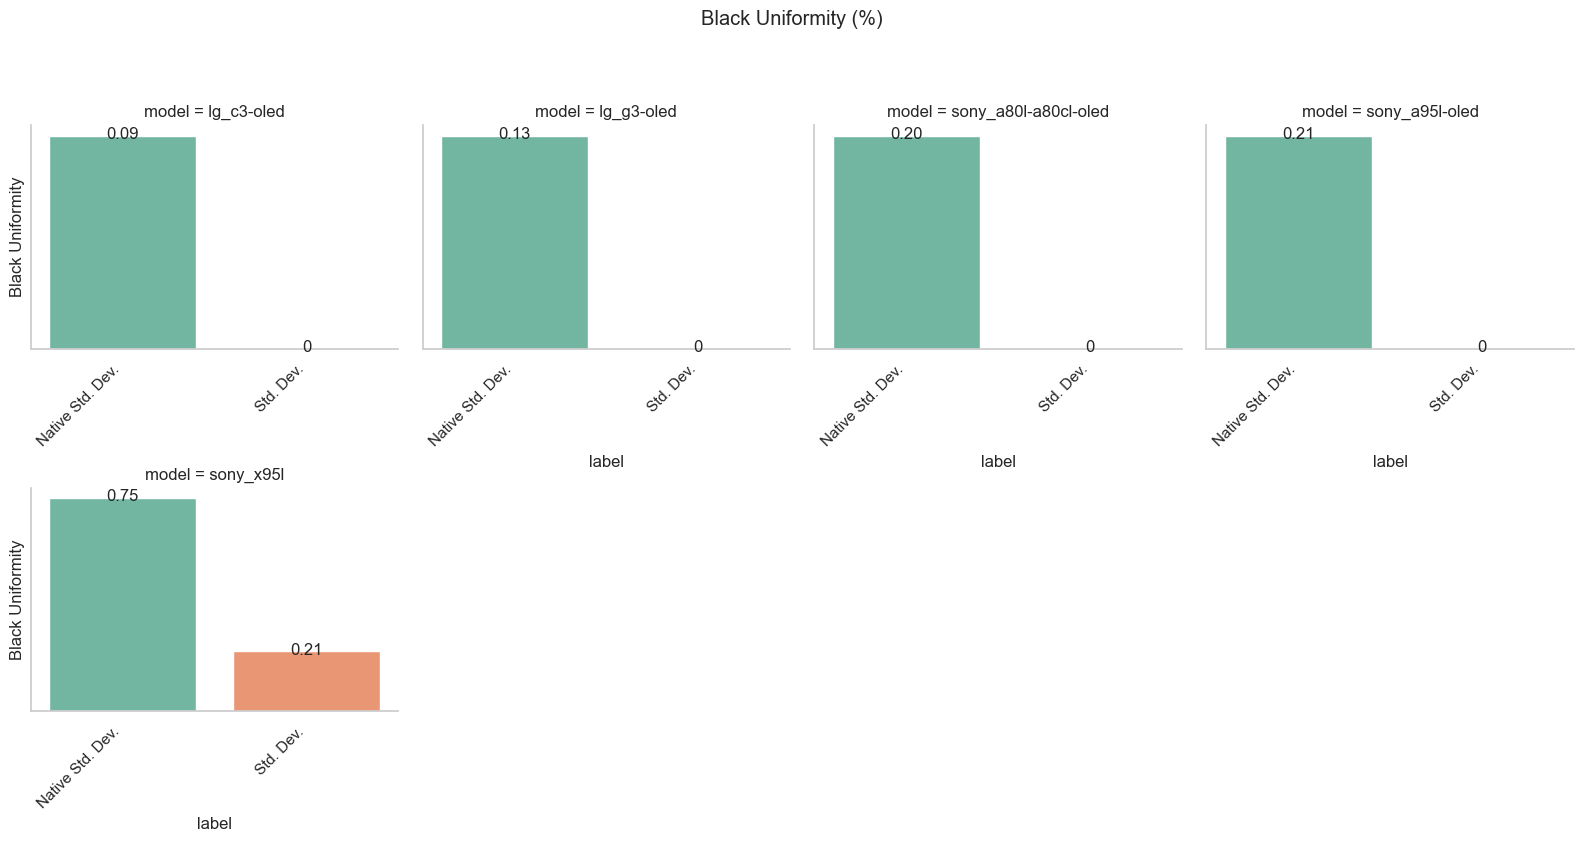

In [29]:
target_col = "Black Uniformity"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Response Time

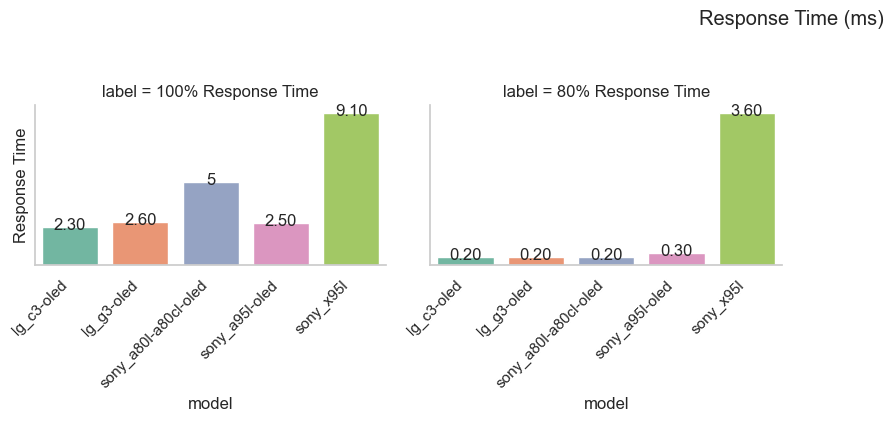

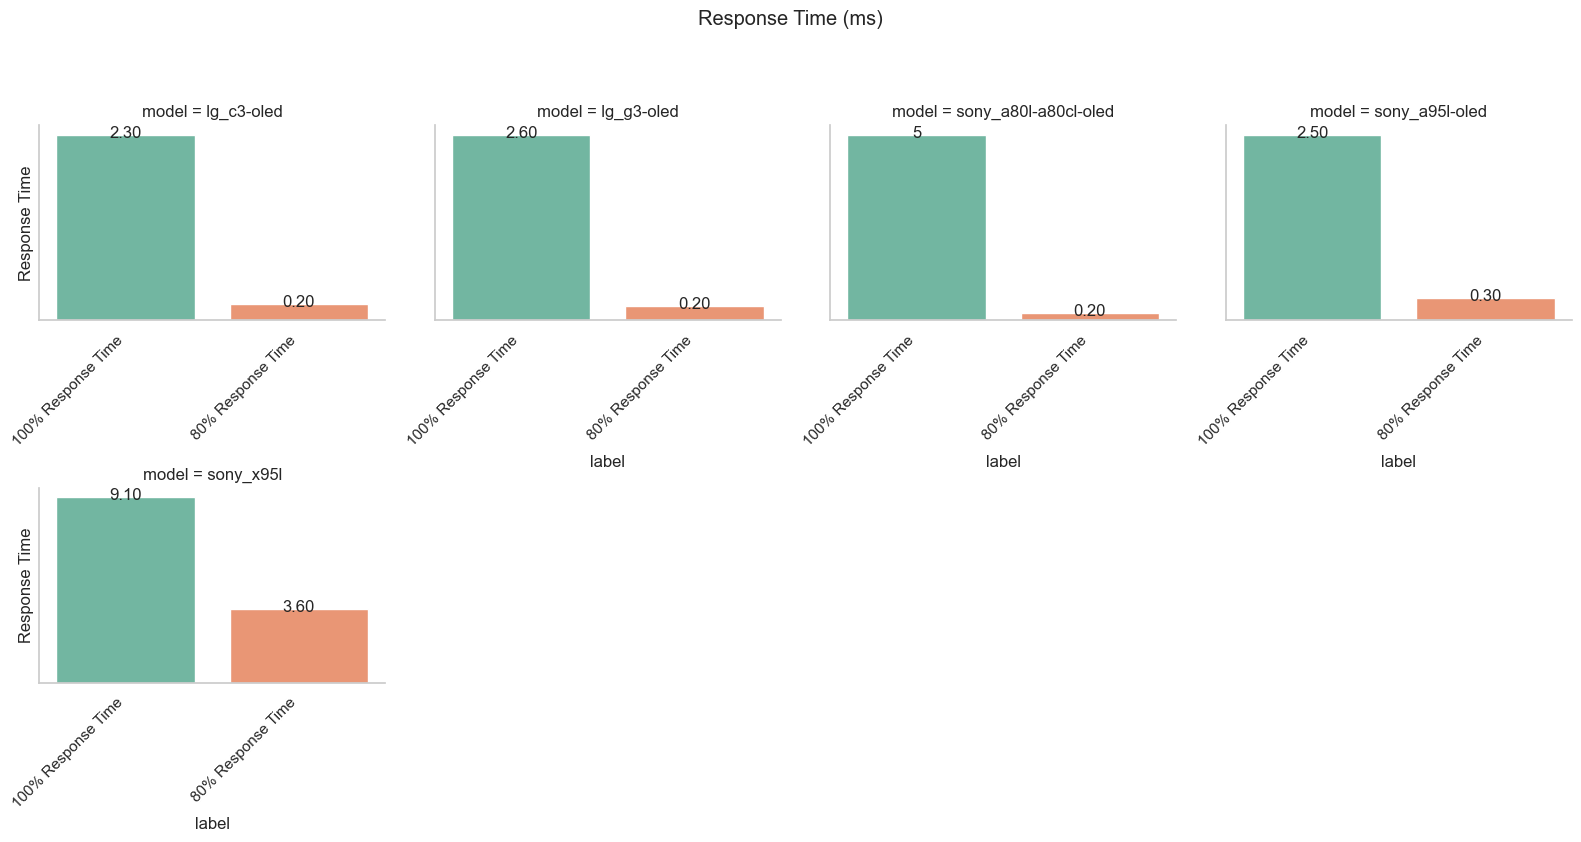

In [30]:
target_col = "Response Time"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Stutter

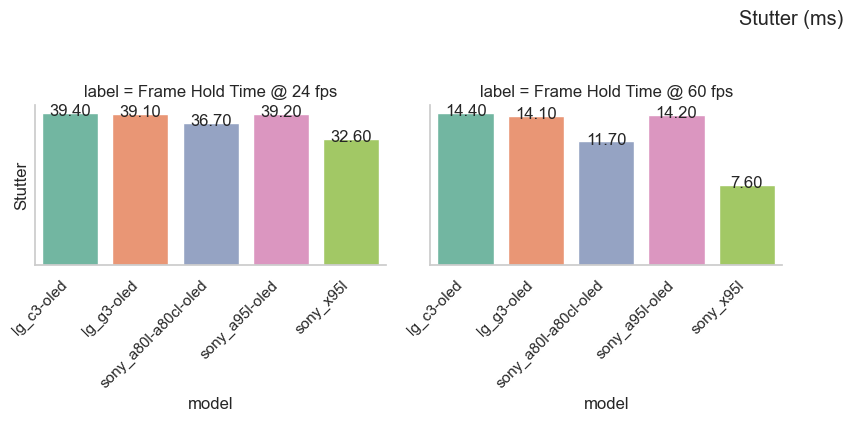

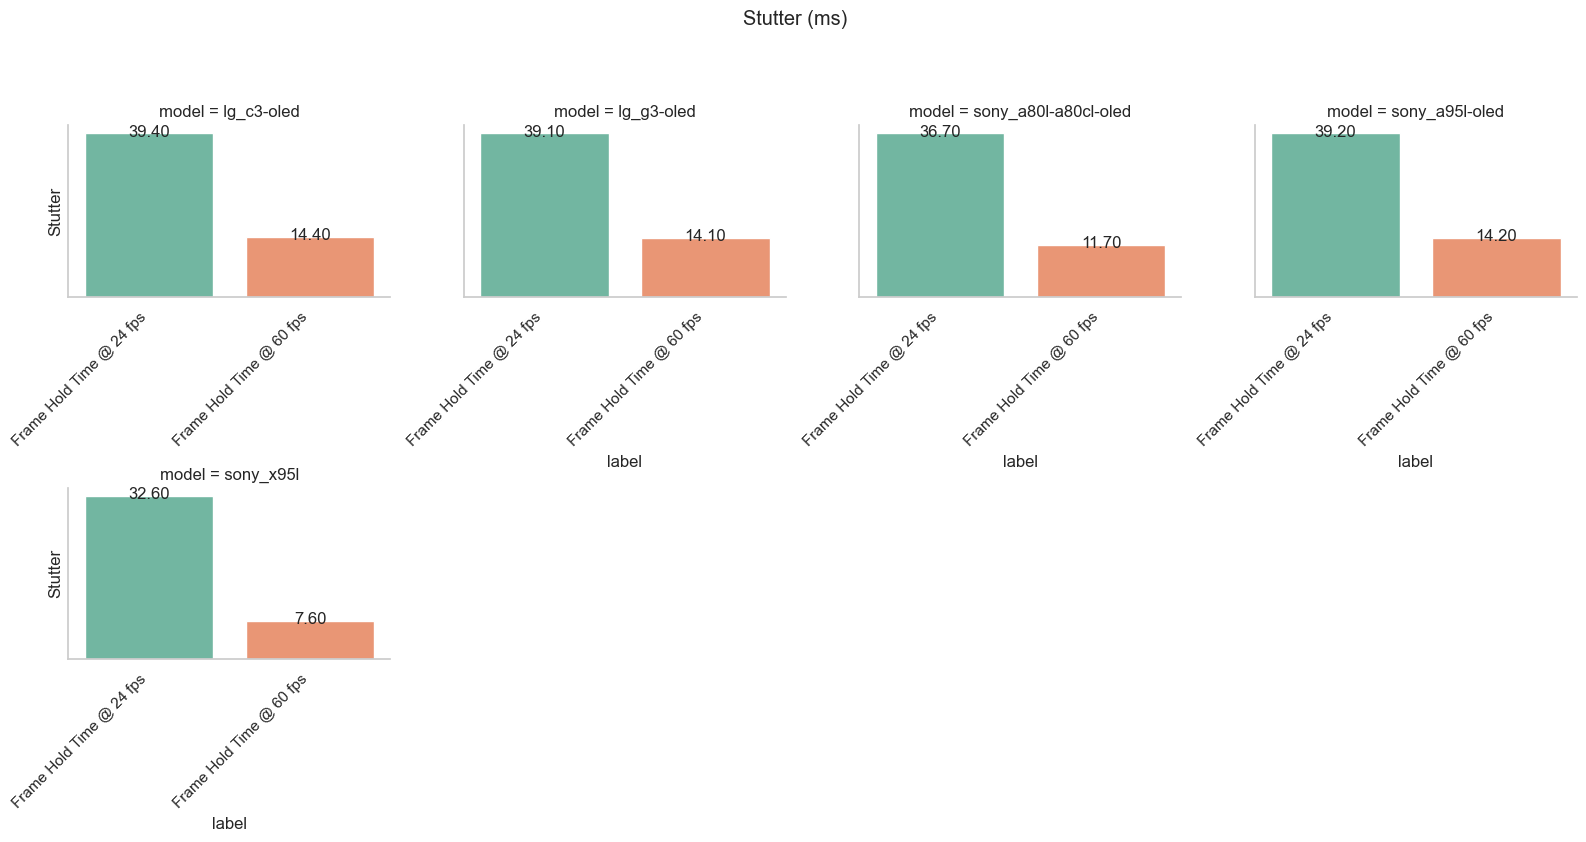

In [31]:
target_col = "Stutter"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Lighting Zone Transitions

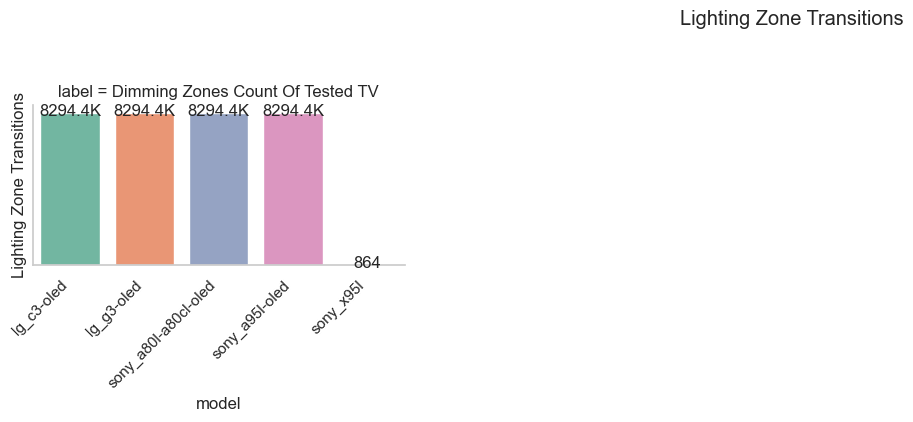

In [32]:
target_col = 'Lighting Zone Transitions'
rvisualizer.plotsns_facet_bar(target_col)

### Flicker-Free

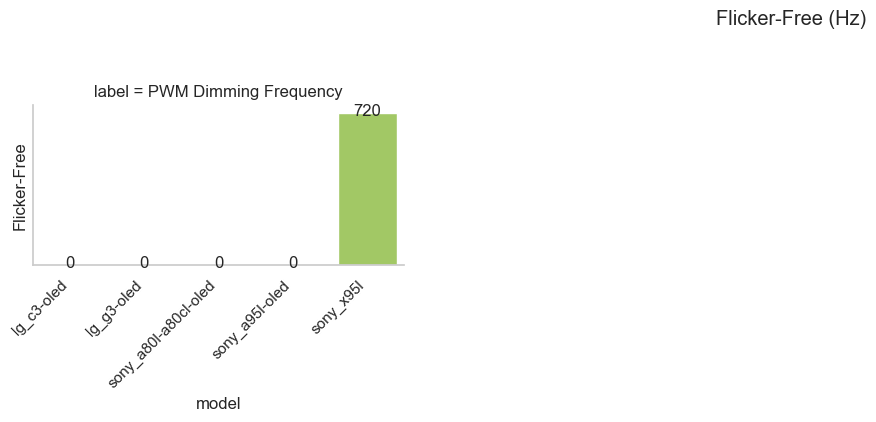

In [33]:
target_col = "Flicker-Free"
rvisualizer.plotsns_facet_bar(target_col)

### Variable Refresh Rate

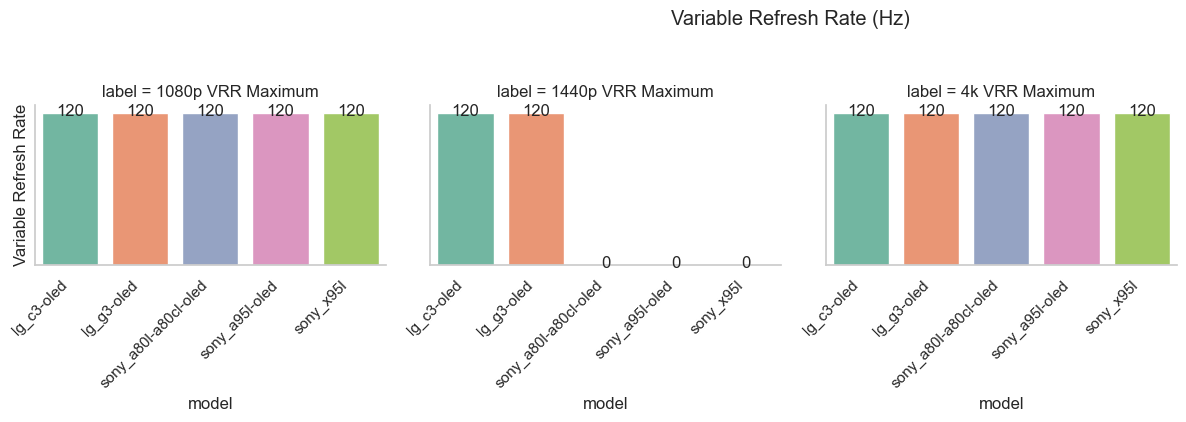

In [34]:
target_col = "Variable Refresh Rate"
rvisualizer.plotsns_facet_bar(target_col)

- colab에서 파일 받기

In [35]:
!zip -r /content/results_rtings.zip /content/results/
files.download('/content/results_rtings.zip')

---

# PCA

In [145]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [146]:
ddf= rvisualizer.df.copy()
ddf['category_header_label'] = ddf['category'] + '_' + ddf['header'] + '_' + ddf['label']
ddf['maker_product'] = ddf['maker'] + '_' + ddf['product']
ddf = ddf.drop(["category","header","label","score","maker","product"], axis=1)[ddf.category.isin(["Picture Quality"])]

ddf_pivot = ddf.pivot_table(index=['maker_product'], columns=['category_header_label'],
                                        values=['result_value'],
                                        aggfunc={'result_value': 'first'})
ddf_pivot.head(2)

result_value  \
category_header_label Picture Quality_Black Uniformity_Native Std. Dev.   
maker_product                                                             
lg_c3-oled                                                        0.093   
lg_g3-oled                                                        0.133   

                                                                  \
category_header_label Picture Quality_Black Uniformity_Std. Dev.   
maker_product                                                      
lg_c3-oled                                                   0.0   
lg_g3-oled                                                   0.0   

                                                             \
category_header_label Picture Quality_Color Gamut_DCI P3 uv   
maker_product                                                 
lg_c3-oled                                            99.51   
lg_g3-oled                                            99.13   

                                                             \
category_header_label Picture Quality_Color Gamut_DCI P3 xy   
maker_product                                                 
lg_c3-oled                                            98.72   
lg_g3-oled                                            97.53   

                                                               \
category_header_label Picture Quality_Color Gamut_Rec 2020 uv   
maker_product                                                   
lg_c3-oled                                              76.01   
lg_g3-oled                                              75.48   

                                                               \
category_header_label Picture Quality_Color Gamut_Rec 2020 xy   
maker_product                                                   
lg_c3-oled                                              72.79   
lg_g3-oled                                              72.46   

                                                                \
category_header_label Picture Quality_Color Volume(ITP)_BT2020   
maker_product                                                    
lg_c3-oled                                                34.1   
lg_g3-oled                                                38.9   

                                                             \
category_header_label Picture Quality_Color Volume(ITP)_DCI   
maker_product                                                 
lg_c3-oled                                             73.8   
lg_g3-oled                                             88.8   

                                                         \
category_header_label Picture Quality_Color Volume_Blue   
maker_product                                             
lg_c3-oled                                         34.0   
lg_g3-oled                                         53.0   

                                                         ...  \
category_header_label Picture Quality_Color Volume_Cyan  ...   
maker_product                                            ...   
lg_c3-oled                                        325.0  ...   
lg_g3-oled                                        456.0  ...   

                                                                           \
category_header_label Picture Quality_SDR Brightness_Sustained 10% Window   
maker_product                                                               
lg_c3-oled                                                         407.0    
lg_g3-oled                                                         605.0    

                                                                            \
category_header_label Picture Quality_SDR Brightness_Sustained 100% Window   
maker_product                                                                
lg_c3-oled                                                         214.0     
lg_g3-oled                                                         305.0     

                 

In [154]:
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(ddf_pivot)
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=ddf_pivot.columns)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numeric_scaled)

explained_variance_ratio_percentage = pca.explained_variance_ratio_ * 100
for i, ratio in enumerate(explained_variance_ratio_percentage):
    print(f"PC{i + 1}: {ratio:.2f}%")

PC1: 62.00%
PC2: 22.43%


In [195]:
pca_result_df = pd.DataFrame(np.round(pca.components_,4), index=["PC1","PC2"], columns=ddf_pivot.columns).T
category_list = []
header_list =[]
label_list = []

for row in pca_result_df.reset_index()["category_header_label"]:
    row_list = row.split("_")
    category_list.append(row_list[0])
    header_list.append(row_list[1])
    label_list.append(row_list[2])

pca_result_df["category"] =category_list
pca_result_df["header"] =header_list
pca_result_df["label"] =label_list
pca_result_df = pca_result_df.reset_index(drop=True)

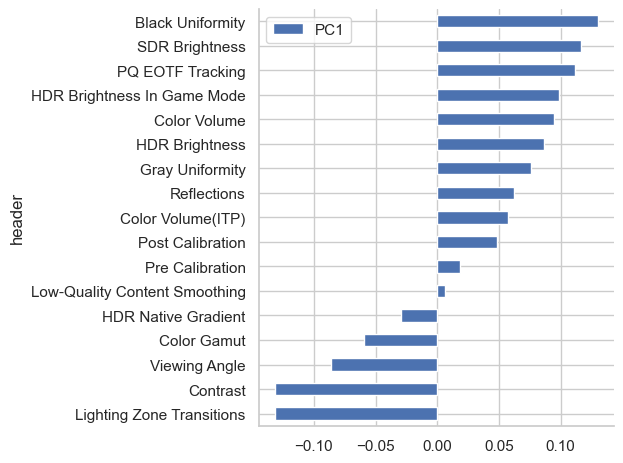

In [197]:
pca_result_by_header_df = pca_result_df.groupby(["header"])[["PC1"]].mean()
pca_result_by_header_df.sort_values(by="PC1", ascending=True).plot(kind="barh")
plt.tight_layout()
sns.despine()
plt.show()

---